### Un proceso de Big Data para la predicción de cantidad de casos de Infecciones Respiratorias Agudas en función del Clima

In [128]:
#Importamos la libreria de pandas
import pandas as pd

## Datasets de enfermedades respiratorias

In [129]:
#Leemos los datasets originales correspondientes a las enfermedades respiratorias
df_respiratorias2022_2023 = pd.read_csv("./Respiratorias2022-2023 SUCIO.csv")
df_respiratorias2020_2021 = pd.read_csv("./Respiratorias2020-2021 SUCIO.csv")
df_respiratorias2019 = pd.read_csv("./Respiratorias2018-2019 SUCIO.csv")

In [130]:
## Observamos las propiedades del dataset del 2022 al 2023
df_respiratorias2022_2023.shape         # Dimensiones (filas, columnas)
df_respiratorias2022_2023.columns       # Lista de nombres de columnas
df_respiratorias2022_2023.dtypes        # Tipos de datos por columna
df_respiratorias2022_2023.info()        # Resumen: tipos de datos, no nulos
df_respiratorias2022_2023.describe()    # Estadísticas básicas (solo numéricas)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557855 entries, 0 to 557854
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   departamento_id          557855 non-null  int64 
 1   departamento_nombre      557855 non-null  object
 2   provincia_id             557855 non-null  int64 
 3   provincia_nombre         557855 non-null  object
 4   año                      557855 non-null  int64 
 5   semanas_epidemiologicas  557855 non-null  int64 
 6   evento_nombre            557855 non-null  object
 7   grupo_edad_id            557855 non-null  int64 
 8   grupo_edad_desc          557855 non-null  object
 9   cantidad_casos           557855 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 42.6+ MB


,departamento_id,provincia_id,año,semanas_epidemiologicas,grupo_edad_id,cantidad_casos
count,557855.000000,557855.000000,557855.000000,557855.000000,557855.000000,557855.000000
mean,160.489950,34.651115,2022.597103,25.592935,6.933976,6.234256
std,211.194573,27.826484,0.612642,14.418149,3.885756,13.016889
min,1.000000,2.000000,2022.000000,1.000000,1.000000,1.000000
25%,35.000000,6.000000,2022.000000,13.000000,3.000000,1.000000
50%,70.000000,26.000000,2023.000000,25.000000,7.000000,2.000000
75%,147.000000,58.000000,2023.000000,38.000000,10.000000,6.000000
max,882.000000,94.000000,2024.000000,52.000000,17.000000,604.000000


El dataset "df_respiratorias2022_2023" contiene  557855 filas. <br> Los nombres de las columnas son: deparmanto_id, departamento_nombre, provincia_id, provincia_nombre, año, semanas_epidemiologicas, evento_nombre, grupo_edad_id, grupo_edad_desc, cantidad_casos <br> Para cada columna, además, se indica la cantidad de datos no-nulos y el tipo de dato (int64 u object) <br> Por ultimo, se muestran las estadisticas basicas de cada columna como la cuenta, la media, la desviación estándar, el valor mínimo, los cuartiles (25%, 50%, 75%) y el valor máximo.

Observamos lo mismo para los otros dfs

In [131]:
#Primero con el 2020 a 2021
df_respiratorias2020_2021.shape         # Dimensiones (filas, columnas)
df_respiratorias2020_2021.columns       # Lista de nombres de columnas
df_respiratorias2020_2021.dtypes        # Tipos de datos por columna
df_respiratorias2020_2021.info()        # Resumen: tipos de datos, no nulos
df_respiratorias2020_2021.describe()    # Estadísticas básicas (solo numéricas)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277413 entries, 0 to 277412
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   departamento_id          277413 non-null  int64 
 1   departamento_nombre      277413 non-null  object
 2   provincia_id             277413 non-null  int64 
 3   provincia_nombre         277413 non-null  object
 4   año                      277413 non-null  int64 
 5   semanas_epidemiologicas  277413 non-null  int64 
 6   evento_nombre            277413 non-null  object
 7   grupo_edad_id            277413 non-null  int64 
 8   grupo_edad_desc          277413 non-null  object
 9   cantidad_casos           277413 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 21.2+ MB


,departamento_id,provincia_id,año,semanas_epidemiologicas,grupo_edad_id,cantidad_casos
count,277413.000000,277413.000000,277413.000000,277413.000000,277413.000000,277413.000000
mean,139.071806,36.213451,2020.578823,24.581364,6.794674,4.112374
std,188.675323,27.312672,0.574255,15.207492,3.838451,7.576438
min,1.000000,2.000000,2020.000000,1.000000,1.000000,1.000000
25%,35.000000,10.000000,2020.000000,11.000000,3.000000,1.000000
50%,70.000000,30.000000,2021.000000,24.000000,7.000000,2.000000
75%,133.000000,58.000000,2021.000000,37.000000,10.000000,4.000000
max,882.000000,94.000000,2022.000000,53.000000,17.000000,334.000000


In [132]:
#Y ahora con el de 2019
df_respiratorias2019.shape         # Dimensiones (filas, columnas)
df_respiratorias2019.columns       # Lista de nombres de columnas
df_respiratorias2019.dtypes        # Tipos de datos por columna
df_respiratorias2019.info()        # Resumen: tipos de datos, no nulos
df_respiratorias2019.describe()    # Estadísticas básicas (solo numéricas)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790773 entries, 0 to 790772
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   departamento_id          790773 non-null  int64 
 1   departamento_nombre      790773 non-null  object
 2   provincia_id             790773 non-null  int64 
 3   provincia_nombre         790773 non-null  object
 4   anio                     790773 non-null  int64 
 5   semanas_epidemiologicas  790773 non-null  int64 
 6   evento_nombre            790773 non-null  object
 7   grupo_edad_id            790773 non-null  int64 
 8   grupo_edad_desc          790773 non-null  object
 9   cantidad_casos           790773 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 60.3+ MB


,departamento_id,provincia_id,anio,semanas_epidemiologicas,grupo_edad_id,cantidad_casos
count,790773.000000,790773.000000,790773.000000,790773.000000,790773.000000,790773.000000
mean,137.371544,35.664675,2018.559488,29.436226,6.504116,2.876172
std,192.836227,27.167579,0.496482,11.761366,3.674042,5.506441
min,1.000000,2.000000,2018.000000,1.000000,1.000000,0.000000
25%,28.000000,10.000000,2018.000000,22.000000,3.000000,1.000000
50%,63.000000,30.000000,2019.000000,30.000000,6.000000,2.000000
75%,126.000000,58.000000,2019.000000,38.000000,10.000000,3.000000
max,882.000000,94.000000,2020.000000,52.000000,17.000000,1819.000000


Nos interesa verificar ahora si hay columnas con valores faltantes en los dataset, por lo tanto, verificamos:

In [133]:
df_respiratorias2022_2023.isnull().sum() 

departamento_id            0
departamento_nombre        0
provincia_id               0
provincia_nombre           0
año                        0
semanas_epidemiologicas    0
evento_nombre              0
grupo_edad_id              0
grupo_edad_desc            0
cantidad_casos             0
dtype: int64

In [134]:
df_respiratorias2020_2021.isnull().sum() 

departamento_id            0
departamento_nombre        0
provincia_id               0
provincia_nombre           0
año                        0
semanas_epidemiologicas    0
evento_nombre              0
grupo_edad_id              0
grupo_edad_desc            0
cantidad_casos             0
dtype: int64

In [135]:
df_respiratorias2019.isnull().sum() 

departamento_id            0
departamento_nombre        0
provincia_id               0
provincia_nombre           0
anio                       0
semanas_epidemiologicas    0
evento_nombre              0
grupo_edad_id              0
grupo_edad_desc            0
cantidad_casos             0
dtype: int64

Ahora, nos interesa saber cual es la cantidad de valores UNICOS por cada columna

In [136]:
df_respiratorias2022_2023.nunique()

departamento_id            142
departamento_nombre        414
provincia_id                24
provincia_nombre            24
año                          3
semanas_epidemiologicas     52
evento_nombre                7
grupo_edad_id               14
grupo_edad_desc             14
cantidad_casos             306
dtype: int64

In [137]:
df_respiratorias2020_2021.nunique() 

departamento_id            137
departamento_nombre        412
provincia_id                24
provincia_nombre            24
año                          3
semanas_epidemiologicas     53
evento_nombre                5
grupo_edad_id               14
grupo_edad_desc             14
cantidad_casos             180
dtype: int64

In [138]:
df_respiratorias2019.nunique() 

departamento_id            128
departamento_nombre        398
provincia_id                24
provincia_nombre            24
anio                         3
semanas_epidemiologicas     52
evento_nombre                3
grupo_edad_id               14
grupo_edad_desc             14
cantidad_casos             174
dtype: int64

Podemos observar que en el dataset del 2022-2023 hay 3 valores unicos para el año, cuando solo deberian ser 2 (2022 y 2023 respectivamente), los mismo sucede en los datasets del 2020-2021 y el de 2019

Procedemos a borrar filas que sean de otros años. Es decir, por ejemplo, en el dataset del 2022 al 2023 no deberiamos tener informacion del 2019

In [139]:
df_respiratorias2022_2023 = df_respiratorias2022_2023[(df_respiratorias2022_2023['año'] == 2022) | (df_respiratorias2022_2023['año'] == 2023)]
df_respiratorias2020_2021 = df_respiratorias2020_2021[(df_respiratorias2020_2021['año'] == 2020) | (df_respiratorias2020_2021['año'] == 2021)]
df_respiratorias2019 = df_respiratorias2019[df_respiratorias2019['anio'] == 2019]

Y volvemos a verficar la cantidad de valores unicos

In [140]:
df_respiratorias2022_2023.nunique() 
#Observar que ahora la columna año solo tiene 2 valores unicos

departamento_id            142
departamento_nombre        413
provincia_id                24
provincia_nombre            24
año                          2
semanas_epidemiologicas     52
evento_nombre                7
grupo_edad_id               14
grupo_edad_desc             14
cantidad_casos             306
dtype: int64

In [141]:
df_respiratorias2020_2021.nunique()
#Observar que ahora la columna año solo tiene 2 valores unicos

departamento_id            137
departamento_nombre        412
provincia_id                24
provincia_nombre            24
año                          2
semanas_epidemiologicas     53
evento_nombre                5
grupo_edad_id               14
grupo_edad_desc             14
cantidad_casos             179
dtype: int64

In [142]:
df_respiratorias2019.nunique()
#Observar que ahora la columna año solo tiene 1 valor unicos

departamento_id            126
departamento_nombre        394
provincia_id                24
provincia_nombre            24
anio                         1
semanas_epidemiologicas     52
evento_nombre                3
grupo_edad_id               14
grupo_edad_desc             14
cantidad_casos             158
dtype: int64

Una vez corregido, nos interesa conocer que informacion tiene guardada el dataset <br>
Veamos que tipos de enfermedades hay, para eso

In [143]:
df_respiratorias2022_2023['evento_nombre'].unique()

array(['Neumonía (sin especificar)', 'Enfermedad tipo influenza (ETI)',
       'Bronquiolitis en menores de 2 años (sin especificar)',
       'Bronquiolitis en menores de 2 años ambulatorios',
       'Neumonía en pacientes ambulatorios',
       'Neumonía en pacientes internados',
       'Bronquiolitis en menores de 2 años internados'], dtype=object)

In [144]:
df_respiratorias2020_2021['evento_nombre'].unique()

array(['Bronquiolitis en menores de 2 años (sin especificar)',
       'Neumonía (sin especificar)', 'Enfermedad tipo influenza (ETI)',
       'Bronquiolitis en menores de 2 años ambulatorios',
       'Bronquiolitis en menores de 2 años internados'], dtype=object)

In [145]:
df_respiratorias2019['evento_nombre'].unique()

array(['Enfermedad tipo influenza (ETI)', 'Neumonia',
       'Bronquiolitis en menores de 2 anos'], dtype=object)

Borraremos todas las columnas con enfermedades sin especificar

In [146]:
#Para el caso de "neumonia (sin especificar) en 2022 y 2023
df_respiratorias2022_2023 = df_respiratorias2022_2023[df_respiratorias2022_2023['evento_nombre'] != 'Neumonía (sin especificar)']
df_respiratorias2020_2021 = df_respiratorias2020_2021[df_respiratorias2020_2021['evento_nombre'] != 'Neumonía (sin especificar)']
# Y con 'Bronquiolitis en menores de 2 años (sin especificar)' en 2023
df_respiratorias2022_2023 = df_respiratorias2022_2023[df_respiratorias2022_2023['evento_nombre'] != 'Bronquiolitis en menores de 2 años (sin especificar)']
df_respiratorias2020_2021 = df_respiratorias2020_2021[df_respiratorias2020_2021['evento_nombre'] != 'Bronquiolitis en menores de 2 años (sin especificar)']
# DE 2019 no hay para borrar 

Y verificamos si hubo un cambio (solo para 2022-2023 y 2020-2021, ya que 2019 queda igual)

In [147]:
df_respiratorias2022_2023['evento_nombre'].unique()

array(['Enfermedad tipo influenza (ETI)',
       'Bronquiolitis en menores de 2 años ambulatorios',
       'Neumonía en pacientes ambulatorios',
       'Neumonía en pacientes internados',
       'Bronquiolitis en menores de 2 años internados'], dtype=object)

In [148]:
df_respiratorias2020_2021['evento_nombre'].unique()

array(['Enfermedad tipo influenza (ETI)',
       'Bronquiolitis en menores de 2 años ambulatorios',
       'Bronquiolitis en menores de 2 años internados'], dtype=object)

Ahora, veamos los grupos etarios que hay

In [149]:
df_respiratorias2022_2023['grupo_edad_desc'].unique()

array(['45 a 64', '10 a 14', '65 a 74', '35 a 44', '5 a 9', '20 a 24',
       '25 a 34', '2 a 4', '15 a 19', '< 6 m', '12 a 23 m', '6 a 11 m',
       'Edad Sin Esp.', '>= a 75'], dtype=object)

In [150]:
df_respiratorias2020_2021['grupo_edad_desc'].unique()

array(['6 a 11 m', '45 a 64', '2 a 4', '15 a 19', '35 a 44', '65 a 74',
       '5 a 9', '25 a 34', '20 a 24', '>= a 75', '< 6 m', '12 a 23 m',
       '10 a 14', 'Edad Sin Esp.'], dtype=object)

In [151]:
df_respiratorias2019['grupo_edad_desc'].unique()

array(['12 a 23 m', '2 a 4', '5 a 9', '10 a 14', '45 a 64', '65 a 74',
       '< 6 m', '35 a 44', '6 a 11 m', '25 a 34', 'Edad Sin Esp.',
       '>= a 75', '20 a 24', '15 a 19'], dtype=object)

In [152]:
#procederemos a borrar todas las filas con edades sin especificar
df_respiratorias2022_2023 = df_respiratorias2022_2023[df_respiratorias2022_2023['grupo_edad_desc'] != 'Edad Sin Esp.']
df_respiratorias2020_2021 = df_respiratorias2020_2021[df_respiratorias2020_2021['grupo_edad_desc'] != 'Edad Sin Esp.']
df_respiratorias2019 = df_respiratorias2019[df_respiratorias2019['grupo_edad_desc'] != 'Edad Sin Esp.']

Y verificamos si hubo un cambio

In [153]:
df_respiratorias2022_2023['grupo_edad_desc'].unique()

array(['45 a 64', '10 a 14', '65 a 74', '35 a 44', '5 a 9', '20 a 24',
       '25 a 34', '2 a 4', '15 a 19', '< 6 m', '12 a 23 m', '6 a 11 m',
       '>= a 75'], dtype=object)

In [154]:
df_respiratorias2020_2021['grupo_edad_desc'].unique()

array(['6 a 11 m', '45 a 64', '2 a 4', '15 a 19', '35 a 44', '65 a 74',
       '5 a 9', '25 a 34', '20 a 24', '>= a 75', '< 6 m', '12 a 23 m',
       '10 a 14'], dtype=object)

In [155]:
df_respiratorias2019['grupo_edad_desc'].unique()

array(['12 a 23 m', '2 a 4', '5 a 9', '10 a 14', '45 a 64', '65 a 74',
       '< 6 m', '35 a 44', '6 a 11 m', '25 a 34', '>= a 75', '20 a 24',
       '15 a 19'], dtype=object)

Nos interesa saber ahora si todas los datasets poseen las mismas columnas, asi que comparamos

In [156]:
df_respiratorias2022_2023.columns

Index(['departamento_id', 'departamento_nombre', 'provincia_id',
       'provincia_nombre', 'año', 'semanas_epidemiologicas', 'evento_nombre',
       'grupo_edad_id', 'grupo_edad_desc', 'cantidad_casos'],
      dtype='object')

In [157]:
df_respiratorias2020_2021.columns

Index(['departamento_id', 'departamento_nombre', 'provincia_id',
       'provincia_nombre', 'año', 'semanas_epidemiologicas', 'evento_nombre',
       'grupo_edad_id', 'grupo_edad_desc', 'cantidad_casos'],
      dtype='object')

In [158]:
df_respiratorias2019.columns

Index(['departamento_id', 'departamento_nombre', 'provincia_id',
       'provincia_nombre', 'anio', 'semanas_epidemiologicas', 'evento_nombre',
       'grupo_edad_id', 'grupo_edad_desc', 'cantidad_casos'],
      dtype='object')

### Ponemos a los dataset en el mismo formato.

Dado que haremos lo mismo para los tres datasets, explicaremos brevemente lo que se hará:

1. Modificaremos la columna 'departamento_nombre' para que tenga el formato de: DEPARTAMENTO_Provincia
    (Por ejemplo, CONFLUENCIA_Neuquén)

2. Luego, el alcance de este trabajo abarca unicamente a las provincias de:
- Buenos Aires
- Neuquén
- Córdoba
- Tucumán, y
- Misiones <br>
Por lo tanto, borraremos todas las filas que no correspondan a esas provincias

3. Renombraremos la columna 'departamento_nombre' a 'Departamento'
   
4. Borraremos aquellas columnas que no aportan información útil ya que corresponden a identificadores

### Dataset 2022_2023

In [159]:
#Ponemos el formato de DEPARTAMENTO_Provincia

df_respiratorias2022_2023['departamento_nombre'] = df_respiratorias2022_2023['departamento_nombre'] + '_' + df_respiratorias2022_2023['provincia_nombre']

#Mostramos como quedaron las filas
df_respiratorias2022_2023.head()

,departamento_id,departamento_nombre,provincia_id,provincia_nombre,año,semanas_epidemiologicas,evento_nombre,grupo_edad_id,grupo_edad_desc,cantidad_casos
1,1,COMUNA 1_CABA,2,CABA,2022,10,Enfermedad tipo influenza (ETI),11,45 a 64,1
3,1,COMUNA 1_CABA,2,CABA,2022,11,Enfermedad tipo influenza (ETI),6,10 a 14,1
8,1,COMUNA 1_CABA,2,CABA,2022,25,Enfermedad tipo influenza (ETI),12,65 a 74,1
11,1,COMUNA 1_CABA,2,CABA,2022,40,Enfermedad tipo influenza (ETI),6,10 a 14,2
12,1,COMUNA 1_CABA,2,CABA,2022,41,Enfermedad tipo influenza (ETI),10,35 a 44,1


In [160]:
#Eliminamos las filas donde la provincia no sea una de las que te interesan:
provincias_deseadas = ['Buenos Aires', 'Neuquén', 'Tucumán', 'Córdoba', 'Misiones']
df_respiratorias2022_2023 = df_respiratorias2022_2023[df_respiratorias2022_2023['provincia_nombre'].isin(provincias_deseadas)].copy()

In [161]:
#Renombramos de 'departamento_nombre' a 'Departamento'
df_respiratorias2022_2023 = df_respiratorias2022_2023.rename(columns={'departamento_nombre': 'Departamento'})
#Volvemos a ver como quedo el dataset
df_respiratorias2022_2023.columns
df_respiratorias2022_2023['Departamento'].unique()

array(['ADOLFO ALSINA_Buenos Aires', 'ALUMINÉ_Neuquén',
       'APÓSTOLES_Misiones', 'BURRUYACÚ_Tucumán', 'CALAMUCHITA_Córdoba',
       'ADOLFO GONZALES CHAVES_Buenos Aires', 'AÑELO_Neuquén',
       'CAINGUÁS_Misiones', 'CAPITAL_Córdoba', 'CRUZ ALTA_Tucumán',
       'ALBERTI_Buenos Aires', 'CANDELARIA_Misiones', 'CATÁN LIL_Neuquén',
       'CHICLIGASTA_Tucumán', 'COLÓN_Córdoba',
       'ALMIRANTE BROWN_Buenos Aires', 'CAPITAL_Misiones',
       'COLLÓN CURÁ_Neuquén', 'CRUZ DEL EJE_Córdoba', 'FAMAILLÁ_Tucumán',
       'AVELLANEDA_Buenos Aires', 'CONCEPCIÓN _Misiones',
       'CONFLUENCIA_Neuquén', 'GENERAL ROCA_Córdoba', 'GRANEROS_Tucumán',
       'AYACUCHO_Buenos Aires', 'CHOS MALAL_Neuquén', 'ELDORADO_Misiones',
       'GENERAL SAN MARTÍN_Córdoba', 'JUAN BAUTISTA ALBERDI_Tucumán',
       'AZUL_Buenos Aires', 'GENERAL MANUEL BELGRANO_Misiones',
       'HUILICHES_Neuquén', 'ISCHILÍN_Córdoba', 'LA COCHA_Tucumán',
       'BAHÍA BLANCA_Buenos Aires', 'GUARANÍ_Misiones',
       'JUÁREZ CELMA

In [162]:
#Vamos a borrar las columnas que no nos interesan en 2022-2023
df_respiratorias2022_2023 = df_respiratorias2022_2023.drop(['departamento_id', 'provincia_id', 'provincia_nombre'], axis=1)
#Volvemos a ver como quedo el dataset
df_respiratorias2022_2023.columns

Index(['Departamento', 'año', 'semanas_epidemiologicas', 'evento_nombre',
       'grupo_edad_id', 'grupo_edad_desc', 'cantidad_casos'],
      dtype='object')

### Dataset 2020_2021

In [163]:
#Ponemos el formato de DEPARTAMENTO_Provincia
df_respiratorias2020_2021['departamento_nombre'] = df_respiratorias2020_2021['departamento_nombre'] + '_' + df_respiratorias2020_2021['provincia_nombre']

#Mostramos como quedaron las filas
df_respiratorias2020_2021.head()

,departamento_id,departamento_nombre,provincia_id,provincia_nombre,año,semanas_epidemiologicas,evento_nombre,grupo_edad_id,grupo_edad_desc,cantidad_casos
6,1,COMUNA 1_CABA,2,CABA,2020,2,Enfermedad tipo influenza (ETI),2,6 a 11 m,1
9,1,COMUNA 1_CABA,2,CABA,2020,3,Enfermedad tipo influenza (ETI),11,45 a 64,1
10,1,COMUNA 1_CABA,2,CABA,2020,3,Enfermedad tipo influenza (ETI),4,2 a 4,1
16,1,COMUNA 1_CABA,2,CABA,2020,4,Enfermedad tipo influenza (ETI),7,15 a 19,1
22,1,COMUNA 1_CABA,2,CABA,2020,5,Enfermedad tipo influenza (ETI),10,35 a 44,1


In [164]:
#Eliminamos las filas donde la provincia no sea una de las que te interesan:
df_respiratorias2020_2021 = df_respiratorias2020_2021[df_respiratorias2020_2021['provincia_nombre'].isin(provincias_deseadas)].copy()

In [165]:
#Renombramos de 'departamento_nombre' a 'Departamento'
df_respiratorias2020_2021 = df_respiratorias2020_2021.rename(columns={'departamento_nombre': 'Departamento'})
#Volvemos a ver como quedo el dataset
df_respiratorias2020_2021.columns
df_respiratorias2020_2021['Departamento'].unique()

array(['ADOLFO ALSINA_Buenos Aires', 'ALUMINÉ_Neuquén',
       'APÓSTOLES_Misiones', 'BURRUYACÚ_Tucumán', 'CALAMUCHITA_Córdoba',
       'ADOLFO GONZALES CHAVES_Buenos Aires', 'AÑELO_Neuquén',
       'CAINGUÁS_Misiones', 'CAPITAL_Córdoba', 'CRUZ ALTA_Tucumán',
       'CANDELARIA_Misiones', 'CATÁN LIL_Neuquén', 'CHICLIGASTA_Tucumán',
       'COLÓN_Córdoba', 'ALMIRANTE BROWN_Buenos Aires',
       'CAPITAL_Misiones', 'COLLÓN CURÁ_Neuquén', 'CRUZ DEL EJE_Córdoba',
       'FAMAILLÁ_Tucumán', 'AVELLANEDA_Buenos Aires',
       'CONCEPCIÓN _Misiones', 'CONFLUENCIA_Neuquén',
       'GENERAL ROCA_Córdoba', 'GRANEROS_Tucumán',
       'AYACUCHO_Buenos Aires', 'CHOS MALAL_Neuquén', 'ELDORADO_Misiones',
       'GENERAL SAN MARTÍN_Córdoba', 'JUAN BAUTISTA ALBERDI_Tucumán',
       'AZUL_Buenos Aires', 'GENERAL MANUEL BELGRANO_Misiones',
       'HUILICHES_Neuquén', 'ISCHILÍN_Córdoba', 'LA COCHA_Tucumán',
       'BAHÍA BLANCA_Buenos Aires', 'GUARANÍ_Misiones',
       'JUÁREZ CELMAN_Córdoba', 'LÁCAR_Neuqu

In [166]:
#Borramos las columnas que no nos interesan en 2020-2021
df_respiratorias2020_2021 = df_respiratorias2020_2021.drop(['departamento_id', 'provincia_id', 'provincia_nombre'], axis=1)
#Volvemos a ver como quedo el dataset
df_respiratorias2020_2021.columns

Index(['Departamento', 'año', 'semanas_epidemiologicas', 'evento_nombre',
       'grupo_edad_id', 'grupo_edad_desc', 'cantidad_casos'],
      dtype='object')

### Dataset 2019

In [167]:
#Ponemos el formato de DEPARTAMENTO_Provincia
df_respiratorias2019['departamento_nombre'] = df_respiratorias2019['departamento_nombre'] + '_' + df_respiratorias2019['provincia_nombre']

#Mostramos como quedaron las filas
df_respiratorias2019.head()

,departamento_id,departamento_nombre,provincia_id,provincia_nombre,anio,semanas_epidemiologicas,evento_nombre,grupo_edad_id,grupo_edad_desc,cantidad_casos
0,91,TALA_Entre Rios,30,Entre Rios,2019,25,Enfermedad tipo influenza (ETI),3,12 a 23 m,1
1,91,TALA_Entre Rios,30,Entre Rios,2019,25,Enfermedad tipo influenza (ETI),4,2 a 4,1
2,91,TALA_Entre Rios,30,Entre Rios,2019,25,Enfermedad tipo influenza (ETI),5,5 a 9,2
3,91,TALA_Entre Rios,30,Entre Rios,2019,25,Enfermedad tipo influenza (ETI),6,10 a 14,1
4,91,TALA_Entre Rios,30,Entre Rios,2019,25,Enfermedad tipo influenza (ETI),11,45 a 64,1


In [168]:
#Eliminamos las filas donde la provincia no sea una de las que te interesan:
df_respiratorias2019 = df_respiratorias2019[df_respiratorias2019['provincia_nombre'].isin(provincias_deseadas)].copy()

In [169]:
#Renombramos de 'departamento_nombre' a 'Departamento'
df_respiratorias2019 = df_respiratorias2019.rename(columns={'departamento_nombre': 'Departamento'})
#Volvemos a ver como quedo el dataset
df_respiratorias2019.columns
df_respiratorias2019['Departamento'].unique()

array(['CARLOS CASARES_Buenos Aires', 'JOSE C. PAZ_Buenos Aires',
       'GENERAL VILLEGAS_Buenos Aires', 'OLAVARRIA_Buenos Aires',
       'AVELLANEDA_Buenos Aires', 'ZARATE_Buenos Aires',
       'TIGRE_Buenos Aires', 'GENERAL LAS HERAS_Buenos Aires',
       'CARLOS TEJEDOR_Buenos Aires', 'ALMIRANTE BROWN_Buenos Aires',
       'ADOLFO ALSINA_Buenos Aires', 'RAUCH_Buenos Aires',
       'IGUAZU_Misiones', 'SAN MIGUEL_Buenos Aires',
       'BAHIA BLANCA_Buenos Aires', 'LOBERIA_Buenos Aires',
       'CHASCOMUS_Buenos Aires', 'CORONEL DORREGO_Buenos Aires',
       'JUNIN_Buenos Aires', 'LOMAS DE ZAMORA_Buenos Aires',
       'FLORENCIO VARELA_Buenos Aires', 'BOLIVAR_Buenos Aires',
       'GENERAL RODRIGUEZ_Buenos Aires', 'SAN ISIDRO_Buenos Aires',
       'SAN JAVIER_Misiones', 'LA MATANZA_Buenos Aires',
       'SAN IGNACIO_Misiones', 'CAPITAL_Misiones',
       'ESTEBAN ECHEVERRIA_Buenos Aires', 'OBERA_Misiones',
       'PELLEGRINI_Buenos Aires', 'SALADILLO_Buenos Aires',
       'MORENO_Bueno

In [170]:
#En este df tambien debemos renombrar la columna 'anio' a 'año' para que coincida con los otros datasets
df_respiratorias2019 = df_respiratorias2019.rename(columns={'anio': 'año'})
df_respiratorias2019.columns

Index(['departamento_id', 'Departamento', 'provincia_id', 'provincia_nombre',
       'año', 'semanas_epidemiologicas', 'evento_nombre', 'grupo_edad_id',
       'grupo_edad_desc', 'cantidad_casos'],
      dtype='object')

In [171]:
#Borramos las columnas que no nos interesan en 2019
df_respiratorias2019 = df_respiratorias2019.drop(['departamento_id', 'provincia_id', 'provincia_nombre'], axis=1)
#Volvemos a ver como quedo el dataset
df_respiratorias2019.columns

Index(['Departamento', 'año', 'semanas_epidemiologicas', 'evento_nombre',
       'grupo_edad_id', 'grupo_edad_desc', 'cantidad_casos'],
      dtype='object')

### COMBINAMOS LOS TRES DATASETS CORRESPONDIENTES A ENFERMEDADES RESPIRATORIAS

Una vez que hemos realizado la limpieza necesaria y todos los datasets tienen el mismo formato, procederemos a combinarlos para que queden en un unico dataset

In [172]:
df_respiratorias = pd.concat([df_respiratorias2022_2023, df_respiratorias2020_2021,df_respiratorias2019], ignore_index=True)

In [173]:
df_respiratorias.shape         # Dimensiones (filas, columnas)
df_respiratorias.columns       # Lista de nombres de columnas
df_respiratorias.dtypes        # Tipos de datos por columna
df_respiratorias.info()        # Resumen: tipos de datos, no nulos
df_respiratorias.describe()    # Estadísticas básicas (solo numéricas)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375311 entries, 0 to 375310
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Departamento             375311 non-null  object
 1   año                      375311 non-null  int64 
 2   semanas_epidemiologicas  375311 non-null  int64 
 3   evento_nombre            375311 non-null  object
 4   grupo_edad_id            375311 non-null  int64 
 5   grupo_edad_desc          375311 non-null  object
 6   cantidad_casos           375311 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 20.0+ MB


,año,semanas_epidemiologicas,grupo_edad_id,cantidad_casos
count,375311.000000,375311.000000,375311.000000,375311.000000
mean,2021.000293,26.430182,6.514118,6.365356
std,1.594434,13.663663,3.591400,13.847630
min,2019.000000,1.000000,1.000000,1.000000
25%,2019.000000,16.000000,3.000000,1.000000
50%,2021.000000,26.000000,6.000000,2.000000
75%,2022.000000,37.000000,10.000000,6.000000
max,2023.000000,53.000000,13.000000,440.000000


Nos terminaron quedando 375311 filas en total

###

### Datasets del Clima

Una vez que tenemos lista la parte de las infecciones respiratorias, procedemos a la limpieza de los datasets del clima, para luego poder unificar ambos

Lo primero que haremos será leer los csv originales correspondientes

In [174]:
df_temp2022_2023 = pd.read_csv("./climaAgrupado.csv")
df_temp2019_2022 =pd.read_csv("./climaAgrupado2019_2022.csv")

In [175]:
#Observaremos las propiedades del csv que contiene informacion de las temperaturas del 2022 al 2023
df_temp2022_2023.shape         # Dimensiones (filas, columnas)
df_temp2022_2023.columns       # Lista de nombres de columnas
df_temp2022_2023.dtypes        # Tipos de datos por columna
df_temp2022_2023.info()        # Resumen: tipos de datos, no nulos
df_temp2022_2023.describe()    # Estadísticas básicas (solo numéricas)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3824 entries, 0 to 3823
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   año                    3824 non-null   int64 
 1   Estacion               3824 non-null   object
 2   semana epidemiologica  3824 non-null   int64 
 3   AVERAGE de Temp, M     3685 non-null   object
 4   AVERAGE de Temp, m     3808 non-null   object
 5   AVERAGE de Precip      3809 non-null   object
 6   AVERAGE de Hum         3809 non-null   object
dtypes: int64(2), object(5)
memory usage: 209.3+ KB


,año,semana epidemiologica
count,3824.000000,3824.000000
mean,2022.496862,26.418410
std,0.500056,15.011815
min,2022.000000,1.000000
25%,2022.000000,13.000000
50%,2022.000000,26.000000
75%,2023.000000,39.000000
max,2023.000000,52.000000


El dataset "df_temp2022_2023" contiene  3824 filas. <br> Los nombres de las columnas son: año, Estación, semana epidemiologica, AVERAGE de Temp, M; AVERAGE de Temp, M; AVERAGE de Precip y AVERAGE de Hum <br> Para cada columna además se indica la cantidad de datos no-nulos y el tipo de dato (int64 u object) <br> Por ultimo, se muestran las estadisticas basicas de cada columna como la cuenta, la media, la desviación estándar, el valor mínimo, los cuartiles (25%, 50%, 75%) y el valor máximo.

Haremos la misma observacion para el otro csv

In [176]:
df_temp2019_2022.shape         # Dimensiones (filas, columnas)
df_temp2019_2022.columns       # Lista de nombres de columnas
df_temp2019_2022.dtypes        # Tipos de datos por columna
df_temp2019_2022.info()        # Resumen: tipos de datos, no nulos
df_temp2019_2022.describe()    # Estadísticas básicas (solo numéricas)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5652 entries, 0 to 5651
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Estacion       5652 non-null   object
 1   Año            5652 non-null   int64 
 2   Semana         5652 non-null   int64 
 3   TempMax        5620 non-null   object
 4   TempMin        5630 non-null   object
 5   Presion        5631 non-null   object
 6   Precipitacion  5635 non-null   object
 7   Humedad        5632 non-null   object
dtypes: int64(2), object(6)
memory usage: 353.4+ KB


,Año,Semana
count,5652.000000,5652.000000
mean,2020.000000,26.668790
std,0.813964,15.109604
min,2019.000000,1.000000
25%,2019.000000,14.000000
50%,2020.000000,27.000000
75%,2021.000000,40.000000
max,2021.000000,53.000000


Como podemos observar, las columnas correspndientes a AVERAGE... son tratadas como object, cuando deberian ser float. <br>
Esto se debe a como se lee la coma decimal, como veremos a continuacion

In [177]:
df_temp2019_2022.head(5)

,Estacion,Año,Semana,TempMax,TempMin,Presion,Precipitacion,Humedad
0,9 DE JULIO_Buenos Aires,2019,1,"28,44","16,86","1.000,32","7,60","62,80"
1,9 DE JULIO_Buenos Aires,2019,2,"27,51","15,66","1.003,17","10,04","68,29"
2,9 DE JULIO_Buenos Aires,2019,3,"27,66","15,69","1.007,73","0,71","66,00"
3,9 DE JULIO_Buenos Aires,2019,4,"30,49","19,20","1.003,14","18,86","77,29"
4,9 DE JULIO_Buenos Aires,2019,5,"30,89","19,09","1.005,13","3,57","64,00"


In [178]:
#Lo mismo sucede en el otro csv
df_temp2022_2023.head(5)

,año,Estacion,semana epidemiologica,"AVERAGE de Temp, M","AVERAGE de Temp, m",AVERAGE de Precip,AVERAGE de Hum
0,2022,9 DE JULIO_Buenos Aires,1,"32,43","16,89","0,00","50,57"
1,2022,9 DE JULIO_Buenos Aires,2,"39,57","20,94","0,29","41,00"
2,2022,9 DE JULIO_Buenos Aires,3,"25,44","17,70","38,50","85,00"
3,2022,9 DE JULIO_Buenos Aires,4,"29,50","17,33","5,86","63,57"
4,2022,9 DE JULIO_Buenos Aires,5,"27,13","15,44","2,57","64,71"


Como nos interesa que estas columnas sean del tipo float, haremos una conversion <br> Debemos convertir la coma (,) a punto (.)

In [179]:
#Primero lo haremos para el csv del 2022 al 2023
# Lista de columnas a convertir para el df de 2022-2023
columnas = [
     'AVERAGE de Temp, M',
    'AVERAGE de Temp, m',
    'AVERAGE de Precip',
    'AVERAGE de Hum'
]

#convertimos
for col in columnas:
    df_temp2022_2023[col] = df_temp2022_2023[col].str.replace(',', '.', regex=False)              # convierte coma decimal a punto
    df_temp2022_2023[col] = pd.to_numeric(df_temp2022_2023[col], errors='coerce')                 # convierte a float

# vemos si hay nulos (temperatura maxima tiene)
print(df_temp2022_2023[columnas].dtypes)
print(df_temp2022_2023[columnas].isna().sum())
df_temp2022_2023.head()

AVERAGE de Temp, M    float64
AVERAGE de Temp, m    float64
AVERAGE de Precip     float64
AVERAGE de Hum        float64
dtype: object
AVERAGE de Temp, M    139
AVERAGE de Temp, m     16
AVERAGE de Precip      15
AVERAGE de Hum         15
dtype: int64


,año,Estacion,semana epidemiologica,"AVERAGE de Temp, M","AVERAGE de Temp, m",AVERAGE de Precip,AVERAGE de Hum
0,2022,9 DE JULIO_Buenos Aires,1,32.43,16.89,0.00,50.57
1,2022,9 DE JULIO_Buenos Aires,2,39.57,20.94,0.29,41.00
2,2022,9 DE JULIO_Buenos Aires,3,25.44,17.70,38.50,85.00
3,2022,9 DE JULIO_Buenos Aires,4,29.50,17.33,5.86,63.57
4,2022,9 DE JULIO_Buenos Aires,5,27.13,15.44,2.57,64.71


In [180]:
#Y hacemos lo mismo para el df de 2019 al 2022
# Lista de columnas a convertir
columnas = [
    'TempMax',
    'TempMin',
    'Presion',
    'Precipitacion',
    'Humedad'
]

#convertimos
for col in columnas:
    df_temp2019_2022[col] = df_temp2019_2022[col].str.replace(',', '.', regex=False)              # convierte coma decimal a punto
    df_temp2019_2022[col] = pd.to_numeric(df_temp2019_2022[col], errors='coerce')                 # convierte a float

# vemos si hay nulos (temperatura maxima tiene)
print(df_temp2019_2022[columnas].dtypes)
print(df_temp2019_2022[columnas].isna().sum())
df_temp2019_2022.head()

TempMax          float64
TempMin          float64
Presion          float64
Precipitacion    float64
Humedad          float64
dtype: object
TempMax            32
TempMin            22
Presion          2695
Precipitacion      17
Humedad            20
dtype: int64


,Estacion,Año,Semana,TempMax,TempMin,Presion,Precipitacion,Humedad
0,9 DE JULIO_Buenos Aires,2019,1,28.44,16.86,NaN,7.60,62.80
1,9 DE JULIO_Buenos Aires,2019,2,27.51,15.66,NaN,10.04,68.29
2,9 DE JULIO_Buenos Aires,2019,3,27.66,15.69,NaN,0.71,66.00
3,9 DE JULIO_Buenos Aires,2019,4,30.49,19.20,NaN,18.86,77.29
4,9 DE JULIO_Buenos Aires,2019,5,30.89,19.09,NaN,3.57,64.00


Podemos observar de la salida por pantalla anterior, que hay filas que contienen nulos (NaN). 
Como cada registro pertenece a una semana epidemiologica, y tenemos el riesgo de perder informacion valiosa, vamos a completar esas filas nulas con el valor promedio.

In [181]:
#Primero con el csv de 2022_2023
columnas = [
     'AVERAGE de Temp, M',
    'AVERAGE de Temp, m',
    'AVERAGE de Precip',
    'AVERAGE de Hum'
]

for col in columnas:
    df_temp2022_2023[col].fillna(df_temp2022_2023[col].mean(), inplace=True)

# Verificar que no haya nulos
print(df_temp2022_2023[columnas].isna().sum())
df_temp2022_2023.head()

AVERAGE de Temp, M    0
AVERAGE de Temp, m    0
AVERAGE de Precip     0
AVERAGE de Hum        0
dtype: int64


/tmp/ipykernel_2680639/3450870268.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_temp2022_2023[col].fillna(df_temp2022_2023[col].mean(), inplace=True)


,año,Estacion,semana epidemiologica,"AVERAGE de Temp, M","AVERAGE de Temp, m",AVERAGE de Precip,AVERAGE de Hum
0,2022,9 DE JULIO_Buenos Aires,1,32.43,16.89,0.00,50.57
1,2022,9 DE JULIO_Buenos Aires,2,39.57,20.94,0.29,41.00
2,2022,9 DE JULIO_Buenos Aires,3,25.44,17.70,38.50,85.00
3,2022,9 DE JULIO_Buenos Aires,4,29.50,17.33,5.86,63.57
4,2022,9 DE JULIO_Buenos Aires,5,27.13,15.44,2.57,64.71


In [182]:
#Nuevamente, aplicamos la misma idea para el df del 2019_2022

columnas = [
    'TempMax',
    'TempMin',
    'Presion',
    'Precipitacion',
    'Humedad'
]

for col in columnas:
    df_temp2019_2022[col].fillna(df_temp2019_2022[col].mean(), inplace=True)

# Verificar que no haya nulos
print(df_temp2019_2022[columnas].isna().sum())
df_temp2019_2022.head()

TempMax          0
TempMin          0
Presion          0
Precipitacion    0
Humedad          0
dtype: int64


/tmp/ipykernel_2680639/1080099161.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_temp2019_2022[col].fillna(df_temp2019_2022[col].mean(), inplace=True)


,Estacion,Año,Semana,TempMax,TempMin,Presion,Precipitacion,Humedad
0,9 DE JULIO_Buenos Aires,2019,1,28.44,16.86,975.215364,7.60,62.80
1,9 DE JULIO_Buenos Aires,2019,2,27.51,15.66,975.215364,10.04,68.29
2,9 DE JULIO_Buenos Aires,2019,3,27.66,15.69,975.215364,0.71,66.00
3,9 DE JULIO_Buenos Aires,2019,4,30.49,19.20,975.215364,18.86,77.29
4,9 DE JULIO_Buenos Aires,2019,5,30.89,19.09,975.215364,3.57,64.00


Por las dudas, verificamos si hay nulos en las demás columnas

In [183]:
print(df_temp2022_2023.isna().sum())
print(df_temp2019_2022.isna().sum())

año                      0
Estacion                 0
semana epidemiologica    0
AVERAGE de Temp, M       0
AVERAGE de Temp, m       0
AVERAGE de Precip        0
AVERAGE de Hum           0
dtype: int64
Estacion         0
Año              0
Semana           0
TempMax          0
TempMin          0
Presion          0
Precipitacion    0
Humedad          0
dtype: int64


Perfecto!!, ninguna tenia nulos y no perdimos ninguna fila!!. Ahora, debemos unir ambos datasets: este y el anterior

Para ello, haremos join por Departamento, semana_epidemiologica y año, pero antes, todo tiene que tener el mismo nombre para que no quede afuera ninguna fila

In [184]:
#Entonces, para el dataset del 2022 al 2023
# -Renombraremos la columna Estacion por Departamento
# -Renombraremos la columna semana epidemiologica por semanas_epidemiologicas

#Ademas, ya que estamos, para hacerlo mas legible cambiaremos tambien el nombre del resto de columnas
#Average de Temp, m --> Temperatura Min
#Average de Temp, M --> Temperatura Max
#Average de Precip ---> Precip
#Average de Hum ---> Humedad

df_temp2022_2023 = df_temp2022_2023.rename(columns={
    'Estacion': 'Departamento',
    'semana epidemiologica': 'semanas_epidemiologicas',
    'AVERAGE de Temp, m' : 'Temperatura Min',
    'AVERAGE de Temp, M': 'Temperatura Max',
    'AVERAGE de Precip': 'Precip',
    'AVERAGE de Hum': 'Humedad',
})

#Una vez hecho esto verificamos.
df_temp2022_2023.columns       # Lista de nombres de columnas

Index(['año', 'Departamento', 'semanas_epidemiologicas', 'Temperatura Max',
       'Temperatura Min', 'Precip', 'Humedad'],
      dtype='object')

In [185]:
#Para el df del 2019 al 2022 aplicamos una idea similar, pero debemos hacer mas cambios
# -Renombraremos la columna Estacion por Departamento
# -Renombraremos la columna Semana por semanas_epidemiologicas

#Ademas, ya que estamos, para hacerlo mas legible cambiaremos tambien el nombre del resto de columnas
#TempMin --> Temperatura Min
#TempMax --> Temperatura Max
#Precipitacion ---> Precip

df_temp2019_2022 = df_temp2019_2022.rename(columns={
    'Año': 'año',
    'Estacion': 'Departamento',
    'Semana': 'semanas_epidemiologicas',
    'TempMin' : 'Temperatura Min',
    'TempMax': 'Temperatura Max',
    'Precipitacion': 'Precip',
})

#Ademas, debemos borrar la columna de Presion porque no la usaremos
df_temp2019_2022 = df_temp2019_2022.drop(columns=["Presion"])

#Una vez hecho esto verificamos.
df_temp2019_2022.columns       # Lista de nombres de columnas

Index(['Departamento', 'año', 'semanas_epidemiologicas', 'Temperatura Max',
       'Temperatura Min', 'Precip', 'Humedad'],
      dtype='object')

Ya que estamos, veremos que departamentos tiene cada csv

In [186]:
#Primero el de 2022_2023
df_temp2022_2023['Departamento'].unique()

array(['9 DE JULIO_Buenos Aires', 'AZUL_Buenos Aires',
       'BAHÍA BLANCA_Buenos Aires', 'BENITO JUÁREZ_Buenos Aires',
       'BOLÍVAR_Buenos Aires', 'CAPITAL_Misiones', 'CAPITAL_Tucumán',
       'CONFLUENCIA_Neuquén', 'CORONEL PRINGLES_Buenos Aires',
       'CORONEL SUÁREZ_Buenos Aires', 'CÓRDOBA OBSERVATORIO_Córdoba',
       'CAPITAL_Córdoba', 'DOLORES_Buenos Aires', 'EZEIZA_Buenos Aires',
       'GENERAL MANUEL BELGRANO_Misiones',
       'GENERAL PUEYRREDÓN_Buenos Aires', 'IGUAZÚ_Misiones',
       'JUNÍN_Buenos Aires', 'LA PLATA_Buenos Aires',
       'LAS FLORES_Buenos Aires', 'LÁCAR_Neuquén',
       'MARCOS JUÁREZ_Córdoba', 'MERLO_Buenos Aires',
       'MORÓN_Buenos Aires', 'OBERÁ_Misiones', 'OLAVARRÍA_Buenos Aires',
       'PRESIDENTE ROQUE SÁENZ PEÑA_Córdoba', 'PEHUAJÓ_Buenos Aires',
       'PUNTA INDIO_Buenos Aires', 'RÍO CUARTO_Córdoba',
       'RÍO SECO_Córdoba', 'SAAVEDRA_Buenos Aires',
       'SAN FERNANDO_Buenos Aires', 'SAN JAVIER_Córdoba',
       'TANDIL_Buenos Aires', 

In [187]:
#Y lo mismo con el de 2019_2022
df_temp2019_2022['Departamento'].unique()

array(['9 DE JULIO_Buenos Aires', 'AZUL_Buenos Aires',
       'BAHÍA BLANCA_Buenos Aires', 'BENITO JUÁREZ_Buenos Aires',
       'BOLÍVAR_Buenos Aires', 'CAPITAL_Córdoba', 'CAPITAL_Misiones',
       'CAPITAL_Tucumán', 'CONFLUENCIA_Neuquén',
       'CORONEL PRINGLES_Buenos Aires', 'CORONEL SUÁREZ_Buenos Aires',
       'DOLORES_Buenos Aires', 'EZEIZA_Buenos Aires',
       'GENERAL MANUEL BELGRANO_Misiones',
       'GERENAL PUEYRREDÓN_Buenos Aires', 'IGUAZÚ_Misiones',
       'JUNÍN_Buenos Aires', 'LA PLATA_Buenos Aires',
       'LAS FLORES_Buenos Aires', 'LÁCAR_Neuquén',
       'MARCOS JUÁREZ_Córdoba', 'MERLO_Buenos Aires',
       'MORÓN_Buenos Aires', 'OBERÁ_Misiones', 'OLAVARRÍA_Buenos Aires',
       'PEHUAJÓ_Buenos Aires', 'PRESIDENTE ROQUE SÁENZ PEÑA_Córdoba',
       'PUNTA INDIO_Buenos Aires', 'RÍO CUARTO_Córdoba',
       'RÍO SECO_Córdoba', 'SAAVEDRA_Buenos Aires',
       'SAN FERNANDO_Buenos Aires', 'SAN JAVIER_Córdoba',
       'TANDIL_Buenos Aires', 'TRENQUE LAUQUEN_Buenos Aires',


### COMBINAMOS AMBOS DATASETS CORRESPONDIENTES AL CLIMA

In [188]:
df_temp = pd.concat([df_temp2022_2023, df_temp2019_2022], ignore_index=True)

In [189]:
#Vemos como quedo
df_temp.shape         # Dimensiones (filas, columnas)
df_temp.columns       # Lista de nombres de columnas
df_temp.dtypes        # Tipos de datos por columna
df_temp.info()        # Resumen: tipos de datos, no nulos
df_temp.describe()    # Estadísticas básicas (solo numéricas)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9476 entries, 0 to 9475
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   año                      9476 non-null   int64  
 1   Departamento             9476 non-null   object 
 2   semanas_epidemiologicas  9476 non-null   int64  
 3   Temperatura Max          9476 non-null   float64
 4   Temperatura Min          9476 non-null   float64
 5   Precip                   9476 non-null   float64
 6   Humedad                  9476 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 518.3+ KB


,año,semanas_epidemiologicas,Temperatura Max,Temperatura Min,Precip,Humedad
count,9476.000000,9476.000000,9476.000000,9476.000000,9476.000000,9476.000000
mean,2021.007598,26.567750,23.372100,10.513208,2.434375,67.435573
std,1.413073,15.069925,6.253969,5.903377,4.077892,12.292982
min,2019.000000,1.000000,3.070000,-6.730000,0.000000,23.140000
25%,2020.000000,14.000000,18.570000,5.830000,0.000000,59.710000
50%,2021.000000,27.000000,23.572024,10.595000,0.710000,69.000000
75%,2022.000000,40.000000,28.130000,15.172500,3.170000,76.570000
max,2023.000000,53.000000,41.440000,27.990000,46.710000,96.000000


###

###  Ahora si, uniremos las infecciones respiratorias con el clima

In [190]:
# Join natural por Departamento, año y semana
df_merged = pd.merge(
    df_respiratorias,
    df_temp,
    how='inner',  # puede ser 'left' si querés conservar todas las filas de respiratorias
    on=['Departamento', 'año', 'semanas_epidemiologicas']
)

In [193]:
#Vemos como quedo
df_merged.shape         # Dimensiones (filas, columnas)
df_merged.columns       # Lista de nombres de columnas
df_merged.dtypes        # Tipos de datos por columna
df_merged.info()        # Resumen: tipos de datos, no nulos
df_merged.describe()    # Estadísticas básicas (solo numéricas)
#observamos las primeras 10 filas
df_merged.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90806 entries, 0 to 90805
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Departamento             90806 non-null  object 
 1   año                      90806 non-null  int64  
 2   semanas_epidemiologicas  90806 non-null  int64  
 3   evento_nombre            90806 non-null  object 
 4   grupo_edad_id            90806 non-null  int64  
 5   grupo_edad_desc          90806 non-null  object 
 6   cantidad_casos           90806 non-null  int64  
 7   Temperatura Max          90806 non-null  float64
 8   Temperatura Min          90806 non-null  float64
 9   Precip                   90806 non-null  float64
 10  Humedad                  90806 non-null  float64
dtypes: float64(4), int64(4), object(3)
memory usage: 7.6+ MB


,Departamento,año,semanas_epidemiologicas,evento_nombre,grupo_edad_id,grupo_edad_desc,cantidad_casos,Temperatura Max,Temperatura Min,Precip,Humedad
0,CAPITAL_Córdoba,2022,1,Enfermedad tipo influenza (ETI),12,65 a 74,14,32.77,16.09,0.43,53.14
1,CAPITAL_Córdoba,2022,1,Neumonía en pacientes ambulatorios,8,20 a 24,1,32.77,16.09,0.43,53.14
2,CAPITAL_Córdoba,2022,2,Enfermedad tipo influenza (ETI),9,25 a 34,5,39.03,20.36,1.86,38.29
3,CAPITAL_Córdoba,2022,2,Neumonía en pacientes internados,9,25 a 34,1,39.03,20.36,1.86,38.29
4,CAPITAL_Córdoba,2022,3,Neumonía en pacientes ambulatorios,3,12 a 23 m,1,28.46,18.53,17.41,82.57
5,CAPITAL_Córdoba,2022,4,Enfermedad tipo influenza (ETI),12,65 a 74,16,28.51,15.81,2.00,77.86
6,CAPITAL_Córdoba,2022,4,Neumonía en pacientes ambulatorios,8,20 a 24,1,28.51,15.81,2.00,77.86
7,CAPITAL_Córdoba,2022,7,Enfermedad tipo influenza (ETI),10,35 a 44,16,29.69,15.37,3.86,74.57
8,CAPITAL_Córdoba,2022,7,Neumonía en pacientes ambulatorios,10,35 a 44,4,29.69,15.37,3.86,74.57
9,CAPITAL_Córdoba,2022,7,Neumonía en pacientes internados,10,35 a 44,2,29.69,15.37,3.86,74.57


Nos quedaron 90806 Filas en total!!!
Y lo guardamos en HDFS

In [194]:
df_merged.to_csv('Dataset_Final.csv', encoding='utf-8', index=False)

### Analicemos el dataset resultante

Primero haremos un mapa de calor para ver la relacion entre casos por semana y rango de tempratura

/tmp/ipykernel_2680639/3571044261.py:8: DeprecationWarning: is_interval_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.IntervalDtype)` instead
  if pd.api.types.is_interval_dtype(s):


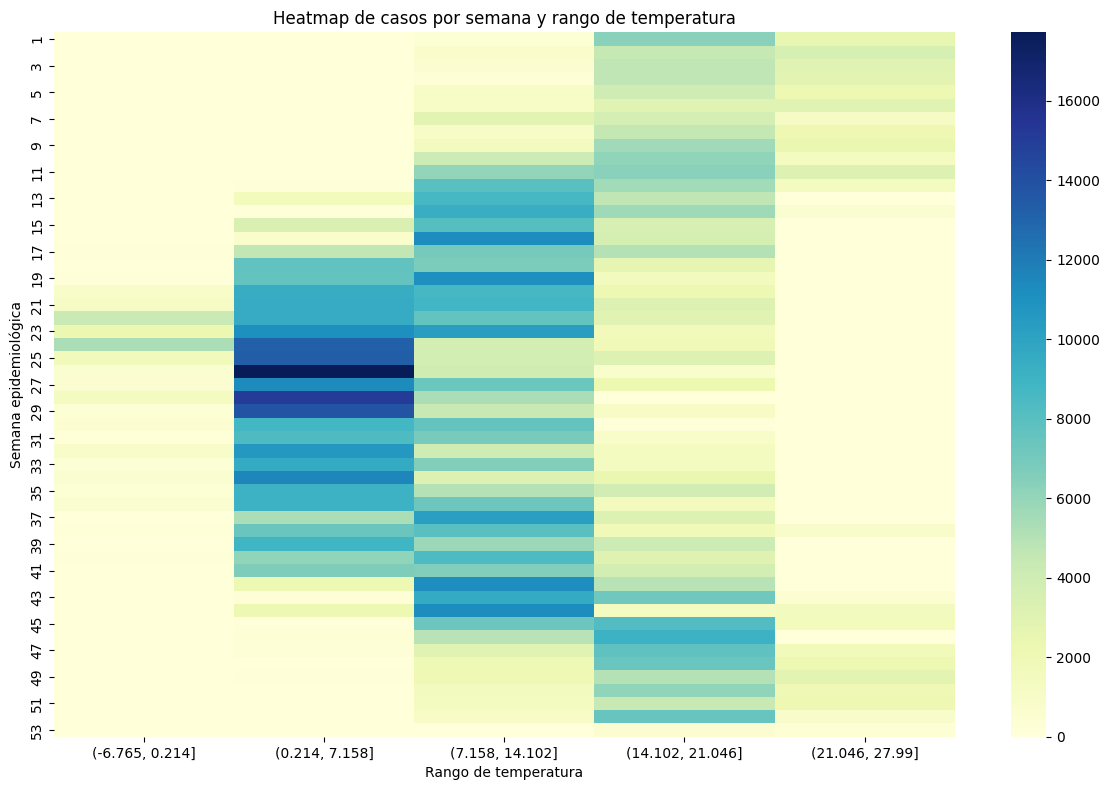

In [195]:
import seaborn as sns
import matplotlib.pyplot as plt

# Aseguramos semana numérica
df_merged['semanas_epidemiologicas'] = pd.to_numeric(df_merged['semanas_epidemiologicas'], errors='coerce')

s = df_merged['Temperatura Min']
if pd.api.types.is_interval_dtype(s):
    s_num = s.mid                      # toma el punto medio del intervalo
else:
    s_num = pd.to_numeric(s, errors='coerce')

df_merged['temp_rango'] = pd.cut(s_num, bins=5)

heatmap_data = (df_merged
    .groupby(['semanas_epidemiologicas', 'temp_rango'], observed=True)['cantidad_casos']
    .sum()
    .unstack(fill_value=0)
    .sort_index()
)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu")
plt.title("Heatmap de casos por semana y rango de temperatura")
plt.xlabel("Rango de temperatura")
plt.ylabel("Semana epidemiológica")
plt.tight_layout()
plt.show()

Ahora, calcularemos la correlacion entre la Temperatura Mínima y la cantidad de casos

In [196]:
corr = df_merged[['Temperatura Min', 'cantidad_casos']].corr()
print(corr)

                 Temperatura Min  cantidad_casos
Temperatura Min         1.000000       -0.037151
cantidad_casos         -0.037151        1.000000


Intentemos calcularla una vez mas, pero ahora agrupando por semana_epidemiologica

In [197]:
tmp = (df_merged.groupby(['semanas_epidemiologicas'])[['Temperatura Min','cantidad_casos']]
                  .mean().reset_index())
tmp[['Temperatura Min','cantidad_casos']].corr()

,Temperatura Min,cantidad_casos
Temperatura Min,1.000000,-0.760203
cantidad_casos,-0.760203,1.000000


¿Por qué ahora sí aparece correlación?
Porque antes se estaban observando todos los datos crudos, incluyendo:
 - Variaciones entre provincias, días, grupos etarios, etc.
 - Datos no alineados temporalmente. <br>
Al agrupar por semana, eliminamos el ruido y se revela la tendencia real a nivel temporal.

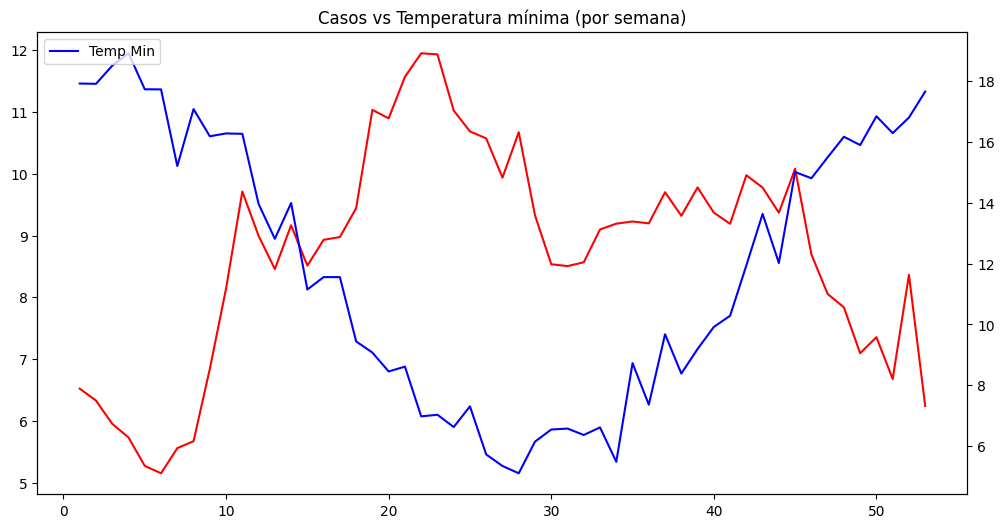

In [198]:
plt.figure(figsize=(12,6))
plt.plot(tmp['semanas_epidemiologicas'], tmp['cantidad_casos'], label='Casos', color='red')
plt.twinx()
plt.plot(tmp['semanas_epidemiologicas'], tmp['Temperatura Min'], label='Temp Min', color='blue')
plt.title("Casos vs Temperatura mínima (por semana)")
plt.xlabel("Semana Epidemiológica")
plt.legend(loc='upper left')
plt.show()

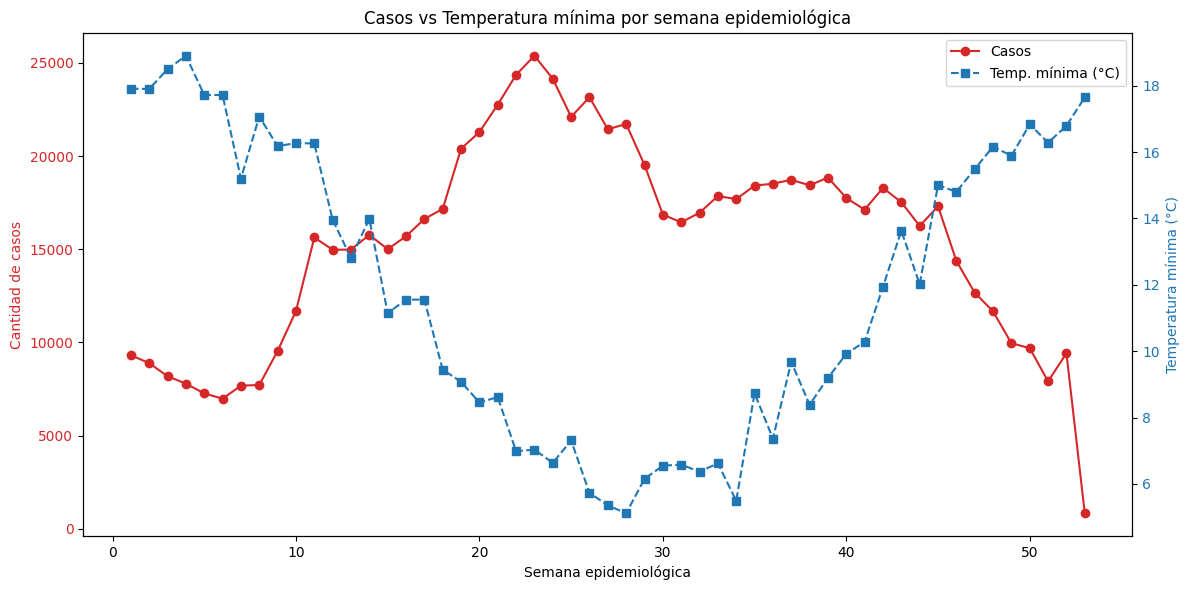

In [199]:
agg = (
    df_merged
    .groupby('semanas_epidemiologicas')[['cantidad_casos', 'Temperatura Min']]
    .agg({'cantidad_casos': 'sum', 'Temperatura Min': 'mean'})
    .reset_index()
    .sort_values('semanas_epidemiologicas')
)

fig, ax1 = plt.subplots(figsize=(12, 6))

# Casos (eje izquierdo) – rojo
l1 = ax1.plot(
    agg['semanas_epidemiologicas'],
    agg['cantidad_casos'],
    color='tab:red', marker='o', label='Casos'
)
ax1.set_xlabel('Semana epidemiológica')
ax1.set_ylabel('Cantidad de casos', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Temperatura mínima (eje derecho) – azul
ax2 = ax1.twinx()
l2 = ax2.plot(
    agg['semanas_epidemiologicas'],
    agg['Temperatura Min'],
    color='tab:blue', marker='s', linestyle='--', label='Temp. mínima (°C)'
)
ax2.set_ylabel('Temperatura mínima (°C)', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Leyenda combinada
lines = l1 + l2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper right')

plt.title('Casos vs Temperatura mínima por semana epidemiológica')
plt.tight_layout()
plt.show()


###

### COMENZEMOS CON EL MODELO LIGHTGBM

LightGBM es una herramienta de inteligencia artificial que se usa para hacer predicciones, como por ejemplo: predecir si va a llover, cuántos casos de gripe habrá, o si una persona va a pagar un préstamo.

Funciona aprendiendo de muchos datos anteriores, y lo hace usando algo parecido a “árboles de decisión”, que son como caminos que ayudan a tomar decisiones. Lo que tiene de especial es que es muy rápido y preciso, incluso cuando hay muchísima información para analizar.



Primero debemos instalarlo en caso de que no lo tengamos. Al finalizar la instalacion, se debe reiniciar el kernel

In [200]:
%pip install lightgbm --break-system-packages

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Luego, uniremos todos los casos de la misma semana epidemiologica, departamento y año. Al realizar esta agrupacion nos terminan quedado 6402 filas con 8 columnas

In [201]:
df_sumado = (
    df_merged
    .groupby(['Departamento', 'año', 'semanas_epidemiologicas'], as_index=False)
    .agg({
        'cantidad_casos': 'sum',
        'Temperatura Max': 'mean',
        'Temperatura Min': 'mean',
        'Precip': 'mean',
        'Humedad': 'mean'
    })
)
df_sumado.shape   

(6402, 8)

Una vez preparado el dataset, agregamos el dataset de temperaturas de 2024. Esto con el fin de que el modelo prediga la cantidad de casos del 2024 y luego comparar esos resultados con los valores reales. <br> Antes que nada, debemos darle el mismo formato que hicimos antes con los datasets del clima.

In [202]:
#Lo leemos
Temperaturas_2024 = pd.read_csv("./Temperaturas_2024.csv")

In [203]:
#Hay algunas columnas que salen como object cuando deberian ser float, esto se debe a la coma decimal
#Debemos conbertir la coma (,) a punto (.)
# Lista de columnas a convertir
columnas = [
     'AVERAGE de Temp, M',
    'AVERAGE de Temp, m',
    'AVERAGE de Precip',
    'AVERAGE de Hum'
]

#convertimos
for col in columnas:
    Temperaturas_2024[col] = Temperaturas_2024[col].str.replace(',', '.', regex=False)              # convierte coma decimal a punto
    Temperaturas_2024[col] = pd.to_numeric(Temperaturas_2024[col], errors='coerce')                 # convierte a float

# vemos si hay nulos (temperatura maxima tiene)
print(Temperaturas_2024[columnas].dtypes)
print(Temperaturas_2024[columnas].isna().sum())
Temperaturas_2024.head(10)

AVERAGE de Temp, M    float64
AVERAGE de Temp, m    float64
AVERAGE de Precip     float64
AVERAGE de Hum        float64
dtype: object
AVERAGE de Temp, M    103
AVERAGE de Temp, m      7
AVERAGE de Precip       2
AVERAGE de Hum          3
dtype: int64


,año,Estacion,semana epidemiologica,"AVERAGE de Temp, M","AVERAGE de Temp, m",AVERAGE de Precip,AVERAGE de Hum
0,2024,9 DE JULIO_Buenos Aires,1,30.90,17.73,2.47,66.56
1,2024,9 DE JULIO_Buenos Aires,2,30.26,16.40,2.13,60.14
2,2024,9 DE JULIO_Buenos Aires,3,30.26,15.39,1.23,58.14
3,2024,9 DE JULIO_Buenos Aires,4,32.16,15.74,0.00,51.14
4,2024,9 DE JULIO_Buenos Aires,5,36.31,18.90,0.00,47.43
5,2024,9 DE JULIO_Buenos Aires,6,31.66,19.80,7.74,74.57
6,2024,9 DE JULIO_Buenos Aires,7,28.06,13.97,0.07,62.43
7,2024,9 DE JULIO_Buenos Aires,8,30.41,17.39,1.86,63.29
8,2024,9 DE JULIO_Buenos Aires,9,30.07,17.90,0.69,63.29
9,2024,9 DE JULIO_Buenos Aires,10,27.91,14.34,3.03,61.57


In [204]:
#En caso de que haya nulos, nuevamente no podemos correr con el riesgo de perder datos, ya que cada fila corresponde a una semana epidemioloogica
#Por lo tanto, completaremos los valores faltantes con el valor promedio

columnas = [
     'AVERAGE de Temp, M',
    'AVERAGE de Temp, m',
    'AVERAGE de Precip',
    'AVERAGE de Hum'
]

for col in columnas:
    Temperaturas_2024[col].fillna(Temperaturas_2024[col].mean(), inplace=True)

# Verificar que no haya nulos
print(Temperaturas_2024[columnas].isna().sum())
Temperaturas_2024.head()

AVERAGE de Temp, M    0
AVERAGE de Temp, m    0
AVERAGE de Precip     0
AVERAGE de Hum        0
dtype: int64


/tmp/ipykernel_2680639/1193184795.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Temperaturas_2024[col].fillna(Temperaturas_2024[col].mean(), inplace=True)


,año,Estacion,semana epidemiologica,"AVERAGE de Temp, M","AVERAGE de Temp, m",AVERAGE de Precip,AVERAGE de Hum
0,2024,9 DE JULIO_Buenos Aires,1,30.90,17.73,2.47,66.56
1,2024,9 DE JULIO_Buenos Aires,2,30.26,16.40,2.13,60.14
2,2024,9 DE JULIO_Buenos Aires,3,30.26,15.39,1.23,58.14
3,2024,9 DE JULIO_Buenos Aires,4,32.16,15.74,0.00,51.14
4,2024,9 DE JULIO_Buenos Aires,5,36.31,18.90,0.00,47.43


In [205]:
#Poe ultimo: 
# -Renombraremos la columna Estacion por Departamento
# -Renombraremos la columna semana epidemiologica por semanas_epidemiologicas

#Ademas, ya que estamos, para hacerlo mas legible cambiaremos tambien el nombre del resto de columnas
#Average de Temp, m --> Temperatura Min
#Average de Temp, M --> Temperatura Max
#Average de Precip ---> Precip
#Average de Hum ---> Humedad

Temperaturas_2024 = Temperaturas_2024.rename(columns={
    'Estacion': 'Departamento',
    'semana epidemiologica': 'semanas_epidemiologicas',
    'AVERAGE de Temp, m' : 'Temperatura Min',
    'AVERAGE de Temp, M': 'Temperatura Max',
    'AVERAGE de Precip': 'Precip',
    'AVERAGE de Hum': 'Humedad',
})

#Una vez hecho esto verificamos.
Temperaturas_2024.columns       # Lista de nombres de columnas

Index(['año', 'Departamento', 'semanas_epidemiologicas', 'Temperatura Max',
       'Temperatura Min', 'Precip', 'Humedad'],
      dtype='object')

### PROBEMOS EL MODELO

Descripcion del funcionamiento del algoritmo:

forecast_with_climate(): Esta función toma el modelo entrenado y lo usa para hacer predicciones semanales hacia adelante, usando datos climáticos reales del dataset Temperaturas_2024.

In [206]:
import numpy as np
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error

pd.set_option('display.width', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

# ============================================================
# 0) Función para predecir usando clima real (definir primero)
# ============================================================
def forecast_with_climate(
    model,
    grp_model,              # dataset ya featurizado con el que entrenaste
    Temperaturas_2024,      # clima futuro real
    feature_cols,
    cat_cols,
    cat_categories,
    n_weeks=None            # si querés cortar las semanas del clima
):
    def estacion(sem):
        if 22 <= sem <= 39:
            return 'invierno'
        elif 40 <= sem or sem <= 12:
            return 'prim_ver'
        else:
            return 'oto_inv'

    def make_ds(year, week):
        return pd.to_datetime(f"{int(year)}{int(week):02d}1", format="%G%V%u")

    # Normalizamos columnas esperadas
    clima_cols = ['Departamento', 'semanas_epidemiologicas',
                  'Temperatura Max', 'Temperatura Min', 'Precip', 'Humedad']
    missing = set(clima_cols) - set(Temperaturas_2024.columns)
    if missing:
        raise ValueError(f"Temperaturas_2024 le faltan columnas: {missing}")

    # Año por defecto 2024 si no viene
    if 'año' not in Temperaturas_2024.columns:
        Temperaturas_2024 = Temperaturas_2024.copy()
        Temperaturas_2024['año'] = 2024

    # Asegurar tipos
    Temperaturas_2024['semanas_epidemiologicas'] = Temperaturas_2024['semanas_epidemiologicas'].astype(int)

    # Fecha ISO
    Temperaturas_2024['ds'] = Temperaturas_2024.apply(
        lambda r: make_ds(r['año'], r['semanas_epidemiologicas']), axis=1
    )

    Temperaturas_2024 = Temperaturas_2024.sort_values(
        ['Departamento', 'año', 'semanas_epidemiologicas']
    ).reset_index(drop=True)

    by_keys = ['Departamento']
    last_all = grp_model.groupby(by_keys, observed=True).tail(1).copy()

    preds = []

    for depto, last in last_all.groupby('Departamento'):
        clima_dep = Temperaturas_2024[Temperaturas_2024['Departamento'] == depto].copy()
        if clima_dep.empty:
            continue
        if n_weeks is not None:
            clima_dep = clima_dep.head(n_weeks)

        last = last.copy()
        for _, row_c in clima_dep.iterrows():
            cur = last.copy()

            cur['ds'] = row_c['ds']
            cur['semanas_epidemiologicas'] = int(row_c['semanas_epidemiologicas'])
            cur['mes'] = cur['ds'].dt.month
            cur['semana_iso'] = cur['ds'].dt.isocalendar().week.astype(int)
            cur['estacion'] = cur['semana_iso'].apply(estacion)

            # Clima real
            cur['Temperatura Max'] = row_c['Temperatura Max']
            cur['Temperatura Min'] = row_c['Temperatura Min']
            cur['Precip']          = row_c['Precip']
            cur['Humedad']         = row_c['Humedad']
            cur['temp_mean']  = (cur['Temperatura Max'] + cur['Temperatura Min']) / 2
            cur['temp_range'] =  cur['Temperatura Max'] - cur['Temperatura Min']

            # Lags autoregresivos
            for lag in [4,3,2,1]:
                cur[f'y_lag{lag}'] = last['cantidad_casos'] if lag == 1 else last[f'y_lag{lag-1}']
            for lag in [2,1]:
                cur[f'tmin_lag{lag}'] = last['Temperatura Min'] if lag == 1 else last[f'tmin_lag{lag-1}']
                cur[f'hum_lag{lag}']  = last['Humedad'] if lag == 1 else last[f'hum_lag{lag-1}']

            cur['y_roll3'] = last[['cantidad_casos','y_lag1','y_lag2']].mean(axis=1)
            cur['y_roll5'] = last[['cantidad_casos','y_lag1','y_lag2','y_lag3','y_lag4']].mean(axis=1)

            # Reaplicar categorías
            for c in cat_cols:
                cur[c] = pd.Categorical(cur[c], categories=cat_categories[c])

            # Predicción
            cur_X = cur[feature_cols]
            y_hat = model.predict(cur_X)
            cur['cantidad_casos'] = y_hat

            preds.append(cur[by_keys + ['ds','semanas_epidemiologicas','cantidad_casos']])
            last = cur.copy()

    forecast = (pd.concat(preds, ignore_index=True)
                .rename(columns={'cantidad_casos':'cantidad_casos_pred'})
                .sort_values(['Departamento','ds']))
    return forecast

# ============================================================
# 1) A partir de acá, tu pipeline con df_sumado
# ============================================================

# 1) Fecha ISO
df_sumado['ds'] = pd.to_datetime(
    df_sumado['año'].astype(int).astype(str) +
    df_sumado['semanas_epidemiologicas'].astype(int).astype(str) + '1',
    format='%G%V%u'
)

grp = (df_sumado
       .groupby(['Departamento','año','semanas_epidemiologicas','ds'], as_index=False, observed=True)
       .agg({
           'cantidad_casos': 'sum',
           'Temperatura Max': 'mean',
           'Temperatura Min': 'mean',
           'Precip': 'mean',
           'Humedad': 'mean'
       }))

# 2) Features
grp['temp_mean']   = (grp['Temperatura Max'] + grp['Temperatura Min']) / 2
grp['temp_range']  = grp['Temperatura Max'] - grp['Temperatura Min']
grp['mes']         = grp['ds'].dt.month
grp['semana_iso']  = grp['ds'].dt.isocalendar().week.astype(int)

def estacion(sem):
    if 22 <= sem <= 39:  # invierno aprox
        return 'invierno'
    elif 40 <= sem or sem <= 12:
        return 'prim_ver'
    else:
        return 'oto_inv'

grp['estacion'] = grp['semana_iso'].apply(estacion)

by_keys = ['Departamento']
for lag in [1,2,3,4]:
    grp[f'y_lag{lag}'] = grp.groupby(by_keys, observed=True)['cantidad_casos'].shift(lag)
for lag in [1,2]:
    grp[f'tmin_lag{lag}'] = grp.groupby(by_keys, observed=True)['Temperatura Min'].shift(lag)
    grp[f'hum_lag{lag}']  = grp.groupby(by_keys, observed=True)['Humedad'].shift(lag)

grp['y_roll3'] = grp.groupby(by_keys, observed=True)['cantidad_casos'].transform(lambda s: s.rolling(3).mean())
grp['y_roll5'] = grp.groupby(by_keys, observed=True)['cantidad_casos'].transform(lambda s: s.rolling(5).mean())

grp_model = grp.dropna().reset_index(drop=True)

# 3) Train
target = 'cantidad_casos'
cat_cols = ['Departamento','estacion']
for c in cat_cols:
    grp_model[c] = grp_model[c].astype('category')

cat_categories = {c: grp_model[c].cat.categories for c in cat_cols}

feature_cols = [
    'Temperatura Max','Temperatura Min','temp_mean','temp_range',
    'Precip','Humedad',
    'tmin_lag1','tmin_lag2','hum_lag1','hum_lag2',
    'y_lag1','y_lag2','y_lag3','y_lag4','y_roll3','y_roll5',
    'mes','semana_iso','estacion',
    'Departamento'
]

X = grp_model[feature_cols]
y = grp_model[target]

cut_date = grp_model['ds'].quantile(0.8)
X_train = X[grp_model['ds'] <= cut_date]
y_train = y[grp_model['ds'] <= cut_date]
X_valid = X[grp_model['ds'] >  cut_date]
y_valid = y[grp_model['ds'] >  cut_date]

model = lgb.LGBMRegressor(
    n_estimators=5000,
    learning_rate=0.02,
    num_leaves=63,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
   # objective='poisson',
)

model.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
    eval_metric='mae',
    categorical_feature=cat_cols,
    callbacks=[lgb.early_stopping(200), lgb.log_evaluation(200)]
)

pred_valid = model.predict(X_valid)
print("MAE valid:", mean_absolute_error(y_valid, pred_valid))
print("Promedio de casos reales en validación:", y_valid.mean())
print("MAE como porcentaje:", mean_absolute_error(y_valid, pred_valid) / y_valid.mean() * 100)

# 4) Forecast con clima real 2024
Temperaturas_2024['semanas_epidemiologicas'] = Temperaturas_2024['semanas_epidemiologicas'].astype(int)

forecast_2024 = forecast_with_climate(
    model=model,
    grp_model=grp_model,
    Temperaturas_2024=Temperaturas_2024,
    feature_cols=feature_cols,
    cat_cols=cat_cols,
    cat_categories=cat_categories,
    n_weeks=None)

print(forecast_2024.head(10))
forecast_2024.to_csv("Resultado.csv", index=False)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009857 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4186
[LightGBM] [Info] Number of data points in the train set: 5012, number of used features: 20
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 119.273943
Training until validation scores don't improve for 200 rounds
[200]	valid_0's l1: 15.3812	valid_0's l2: 1681.55
[400]	valid_0's l1: 12.2846	valid_0's l2: 1295.44
[600]	valid_0's l1: 11.6448	valid_0's l2: 1206.43
[800]	valid_0's l1: 11.4943	valid_0's l2: 1192.49
[1000]	valid_0's l1: 11.4891	valid_0's l2: 1201.11
Early stopping, best iteration is:
[849]	valid_0's l1: 11.4596	valid_0's l2: 1186.29
MAE valid: 11.459616039100498
Promedio de casos reales en validación: 171.20416333066453
MAE como p

/tmp/ipykernel_2680639/805166244.py:61: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for depto, last in last_all.groupby('Departamento'):


              Departamento         ds  semanas_epidemiologicas  cantidad_casos_pred
0  9 DE JULIO_Buenos Aires 2024-01-01                        1             4.925096
1  9 DE JULIO_Buenos Aires 2024-01-08                        2             4.408566
2  9 DE JULIO_Buenos Aires 2024-01-15                        3             5.217375
3  9 DE JULIO_Buenos Aires 2024-01-22                        4             5.320851
4  9 DE JULIO_Buenos Aires 2024-01-29                        5             4.952865
5  9 DE JULIO_Buenos Aires 2024-02-05                        6             5.084340
6  9 DE JULIO_Buenos Aires 2024-02-12                        7             4.970968
7  9 DE JULIO_Buenos Aires 2024-02-19                        8             4.941649
8  9 DE JULIO_Buenos Aires 2024-02-26                        9             4.975523
9  9 DE JULIO_Buenos Aires 2024-03-04                       10             5.041042


### 

### COMPARACION DE RESULTADOS


A continuacion, compararemos los resultados reales (df_respiratorios2024.csv) con los obtenidos en el modelo (resultado.csv)

Pero antes, debemos limpiar el csv que contiene los datos reales

In [207]:
#Lo leemos
df_respiratorias2024 = pd.read_csv("./casos2024.csv")

In [208]:
#Observamos sus propiedades
df_respiratorias2024.shape         # Dimensiones (filas, columnas)
df_respiratorias2024.columns       # Lista de nombres de columnas
df_respiratorias2024.dtypes        # Tipos de datos por columna
df_respiratorias2024.info()        # Resumen: tipos de datos, no nulos
df_respiratorias2024.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557855 entries, 0 to 557854
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   departamento_id          557855 non-null  int64 
 1   departamento_nombre      557855 non-null  object
 2   provincia_id             557855 non-null  int64 
 3   provincia_nombre         557855 non-null  object
 4   año                      557855 non-null  int64 
 5   semanas_epidemiologicas  557855 non-null  int64 
 6   evento_nombre            557855 non-null  object
 7   grupo_edad_id            557855 non-null  int64 
 8   grupo_edad_desc          557855 non-null  object
 9   cantidad_casos           557855 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 42.6+ MB


,departamento_id,provincia_id,año,semanas_epidemiologicas,grupo_edad_id,cantidad_casos
count,557855.000000,557855.000000,557855.000000,557855.000000,557855.000000,557855.000000
mean,160.489950,34.651115,2022.597103,25.592935,6.933976,6.234256
std,211.194573,27.826484,0.612642,14.418149,3.885756,13.016889
min,1.000000,2.000000,2022.000000,1.000000,1.000000,1.000000
25%,35.000000,6.000000,2022.000000,13.000000,3.000000,1.000000
50%,70.000000,26.000000,2023.000000,25.000000,7.000000,2.000000
75%,147.000000,58.000000,2023.000000,38.000000,10.000000,6.000000
max,882.000000,94.000000,2024.000000,52.000000,17.000000,604.000000


In [209]:
#Analizamos si alguna de sus columnas tiene valores faltantes (nulos, NaN)
df_respiratorias2024.isnull().sum() 

departamento_id            0
departamento_nombre        0
provincia_id               0
provincia_nombre           0
año                        0
semanas_epidemiologicas    0
evento_nombre              0
grupo_edad_id              0
grupo_edad_desc            0
cantidad_casos             0
dtype: int64

In [210]:
#observamos la cantidad de valores unicos que tiene cada columna
df_respiratorias2024.nunique() 

departamento_id            142
departamento_nombre        414
provincia_id                24
provincia_nombre            24
año                          3
semanas_epidemiologicas     52
evento_nombre                7
grupo_edad_id               14
grupo_edad_desc             14
cantidad_casos             306
dtype: int64

In [211]:
#Como podemos observar, la columna de año tiene 3 valores unicos, cuando deberia tener uno solo (2024), 
#es por eso que borraremos las filas que sean de otros años
df_respiratorias2024 = df_respiratorias2024[df_respiratorias2024['año'] == 2024]

In [212]:
#Vemos los distintos tipos de enfermedades que hay, para eso
df_respiratorias2024['evento_nombre'].unique()

array(['Enfermedad tipo influenza (ETI)', 'Neumonía (sin especificar)',
       'Bronquiolitis en menores de 2 años (sin especificar)',
       'Bronquiolitis en menores de 2 años ambulatorios',
       'Neumonía en pacientes ambulatorios',
       'Bronquiolitis en menores de 2 años internados',
       'Neumonía en pacientes internados'], dtype=object)

In [213]:
#Borramos las filas con enfermedades sin espeficar
#Es el caso de "neumonia (sin especificar)"
# Y con 'Bronquiolitis en menores de 2 años (sin especificar)'
df_respiratorias2024 = df_respiratorias2024[df_respiratorias2024['evento_nombre'] != 'Neumonía (sin especificar)']
df_respiratorias2024 = df_respiratorias2024[df_respiratorias2024['evento_nombre'] != 'Bronquiolitis en menores de 2 años (sin especificar)']

In [214]:
#verificamos
df_respiratorias2024['evento_nombre'].unique()

array(['Enfermedad tipo influenza (ETI)',
       'Bronquiolitis en menores de 2 años ambulatorios',
       'Neumonía en pacientes ambulatorios',
       'Bronquiolitis en menores de 2 años internados',
       'Neumonía en pacientes internados'], dtype=object)

In [215]:
#Obsevamos los tipos de grupos etarios
df_respiratorias2024['grupo_edad_desc'].unique()

array(['65 a 74', '45 a 64', '< 6 m', '12 a 23 m', '25 a 34', '5 a 9',
       '10 a 14', '6 a 11 m', '15 a 19', '20 a 24', '35 a 44', '2 a 4',
       '>= a 75', 'Edad Sin Esp.'], dtype=object)

In [216]:
#procederemos a borrar todas las filas con edades sin especificar
df_respiratorias2024 = df_respiratorias2024[df_respiratorias2024['grupo_edad_desc'] != 'Edad Sin Esp.']

In [217]:
#volvemos a fijarnos ahora
df_respiratorias2024['grupo_edad_desc'].unique()

array(['65 a 74', '45 a 64', '< 6 m', '12 a 23 m', '25 a 34', '5 a 9',
       '10 a 14', '6 a 11 m', '15 a 19', '20 a 24', '35 a 44', '2 a 4',
       '>= a 75'], dtype=object)

In [218]:
#Ponemos el formato de 'DEPARTAMENTO_Provincia'
df_respiratorias2024['departamento_nombre'] = df_respiratorias2024['departamento_nombre'] + '_' + df_respiratorias2024['provincia_nombre']
#Mostramos como quedaron las filas
df_respiratorias2024.head()

,departamento_id,departamento_nombre,provincia_id,provincia_nombre,año,semanas_epidemiologicas,evento_nombre,grupo_edad_id,grupo_edad_desc,cantidad_casos
34,1,COMUNA 1_CABA,2,CABA,2024,4,Enfermedad tipo influenza (ETI),12,65 a 74,1
35,1,COMUNA 1_CABA,2,CABA,2024,5,Enfermedad tipo influenza (ETI),11,45 a 64,1
333,2,COMUNA 2_CABA,2,CABA,2024,6,Enfermedad tipo influenza (ETI),1,< 6 m,2
524,1,COMUNA 1_CABA,2,CABA,2024,4,Enfermedad tipo influenza (ETI),11,45 a 64,1
728,2,COMUNA 2_CABA,2,CABA,2024,4,Enfermedad tipo influenza (ETI),3,12 a 23 m,1


In [219]:
#Eliminamos las filas donde la provincia no sea una de las que te interesan:
provincias_deseadas = ['Buenos Aires', 'Neuquén', 'Tucumán', 'Córdoba', 'Misiones']
df_respiratorias2024 = df_respiratorias2024[df_respiratorias2024['provincia_nombre'].isin(provincias_deseadas)].copy()

In [220]:
#Renombramos de 'departamento_nombre' a 'Departamento'
df_respiratorias2024 = df_respiratorias2024.rename(columns={'departamento_nombre': 'Departamento'})
#Volvemos a ver como quedo el dataset
df_respiratorias2024.columns
df_respiratorias2024['Departamento'].unique()

array(['ALUMINÉ_Neuquén', 'APÓSTOLES_Misiones', 'BURRUYACÚ_Tucumán',
       'CALAMUCHITA_Córdoba', 'ADOLFO GONZALES CHAVES_Buenos Aires',
       'AÑELO_Neuquén', 'CAINGUÁS_Misiones', 'CAPITAL_Córdoba',
       'CRUZ ALTA_Tucumán', 'CANDELARIA_Misiones', 'CATÁN LIL_Neuquén',
       'CHICLIGASTA_Tucumán', 'COLÓN_Córdoba',
       'ALMIRANTE BROWN_Buenos Aires', 'CAPITAL_Misiones',
       'CRUZ DEL EJE_Córdoba', 'FAMAILLÁ_Tucumán', 'COLLÓN CURÁ_Neuquén',
       'AVELLANEDA_Buenos Aires', 'CONCEPCIÓN _Misiones',
       'CONFLUENCIA_Neuquén', 'GENERAL ROCA_Córdoba', 'GRANEROS_Tucumán',
       'AYACUCHO_Buenos Aires', 'CHOS MALAL_Neuquén', 'ELDORADO_Misiones',
       'GENERAL SAN MARTÍN_Córdoba', 'JUAN BAUTISTA ALBERDI_Tucumán',
       'AZUL_Buenos Aires', 'GENERAL MANUEL BELGRANO_Misiones',
       'HUILICHES_Neuquén', 'ISCHILÍN_Córdoba', 'LA COCHA_Tucumán',
       'BAHÍA BLANCA_Buenos Aires', 'JUÁREZ CELMAN_Córdoba',
       'LÁCAR_Neuquén', 'LEALES_Tucumán', 'LONCOPUÉ_Neuquén',
       'LULES_

In [221]:
#Vamos a borrar las columnas que no nos interesan porque corresponden a identificadores (id)
df_respiratorias2024 = df_respiratorias2024.drop(['departamento_id', 'provincia_id', 'provincia_nombre', 'año', 'grupo_edad_id', 'evento_nombre', 'grupo_edad_desc'], axis=1)
#Volvemos a ver como quedo el dataset
df_respiratorias2024.columns

Index(['Departamento', 'semanas_epidemiologicas', 'cantidad_casos'], dtype='object')

### COMPARACION

Una vez que tenemos el documento de la misma manera que el generado por el modelo, es posible compararlo

In [222]:
#Primero leemos el csv generado por el modelo
resultadoLight = pd.read_csv("Resultado.csv")

In [223]:
#Primero filtramos los predecidos hasta la semana 13
#Esto se debe a que los resultados reales solo llegan hasta la semana 13
resultadoLight = resultadoLight[resultadoLight['semanas_epidemiologicas'] <= 13]

In [224]:
# Agrupamos los datos reales exactamente igual a como lo agrupa el modelo
df_reales_agrupado = (
    df_respiratorias2024
    .groupby(['Departamento', 'semanas_epidemiologicas'], as_index=False)
    .agg({'cantidad_casos': 'sum'})
)

In [225]:
#Queremos observar que departamento se encuentran en un csv pero no el otro, para ello:

# Departamentos en reales
set_reales = set(df_reales_agrupado['Departamento'].unique())

# Departamentos en predichos
set_predichos = set(resultadoLight['Departamento'].unique())

# Diferencias
print("En reales pero no en predichos:", set_reales - set_predichos)
print("En predichos pero no en reales:", set_predichos - set_reales)

En reales pero no en predichos: {'FAMAILLÁ_Tucumán', 'RÍO CHICO_Tucumán', 'CONCEPCIÓN _Misiones', 'SAN JUSTO_Córdoba', 'TERCERO ARRIBA_Córdoba', 'CAINGUÁS_Misiones', 'CATÁN LIL_Neuquén', 'CORONEL DORREGO_Buenos Aires', 'CORONEL PRINGLES_Buenos Aires', 'TAFÍ DEL VALLE_Tucumán', 'PUNILLA_Córdoba', 'SAN JAVIER_Córdoba', 'GENERAL SAN MARTÍN_Buenos Aires', 'LUJÁN_Buenos Aires', 'GUARANÍ_Misiones', 'CRUZ ALTA_Tucumán', 'RÍO PRIMERO_Córdoba', 'SAN VICENTE_Buenos Aires', 'PELLEGRINI_Buenos Aires', 'TULUMBA_Córdoba', 'ELDORADO_Misiones', 'JOSÉ C. PAZ_Buenos Aires', 'GENERAL BELGRANO_Buenos Aires', 'MONTEROS_Tucumán', 'NECOCHEA_Buenos Aires', 'JUAN BAUTISTA ALBERDI_Tucumán', 'GENERAL ROCA_Córdoba', 'HUILICHES_Neuquén', 'ESTEBAN ECHEVERRÍA_Buenos Aires', 'POCHO_Córdoba', 'BURRUYACÚ_Tucumán', 'RIVADAVIA_Buenos Aires', 'UNIÓN_Córdoba', 'ZAPALA _Neuquén', 'SAN MIGUEL_Buenos Aires', 'SAN ALBERTO_Córdoba', 'PINAMAR _Buenos Aires', 'PATAGONES_Buenos Aires', 'SAN NICOLÁS_Buenos Aires', 'CAÑUELAS_Buenos 

In [226]:
#Hacemos un join de ambos, esto nos asegura que quedan las filas que pertenecen a ambos csv
df_comparacion = pd.merge(
    df_reales_agrupado,
    resultadoLight,
    on=['Departamento', 'semanas_epidemiologicas'],
    suffixes=('_real', '_pred')
)

In [227]:
print(df_comparacion[['cantidad_casos', 'cantidad_casos_pred']].describe())

       cantidad_casos  cantidad_casos_pred
count      345.000000           345.000000
mean        76.504348            85.709023
std        106.840925           143.682360
min          1.000000             2.497794
25%         17.000000            11.462995
50%         49.000000            48.970217
75%         96.000000            92.849846
max       1022.000000           869.754113


Hagamos un grafico para observar visualmente las predicciones del modelo y las reales segun semana epidemiologica

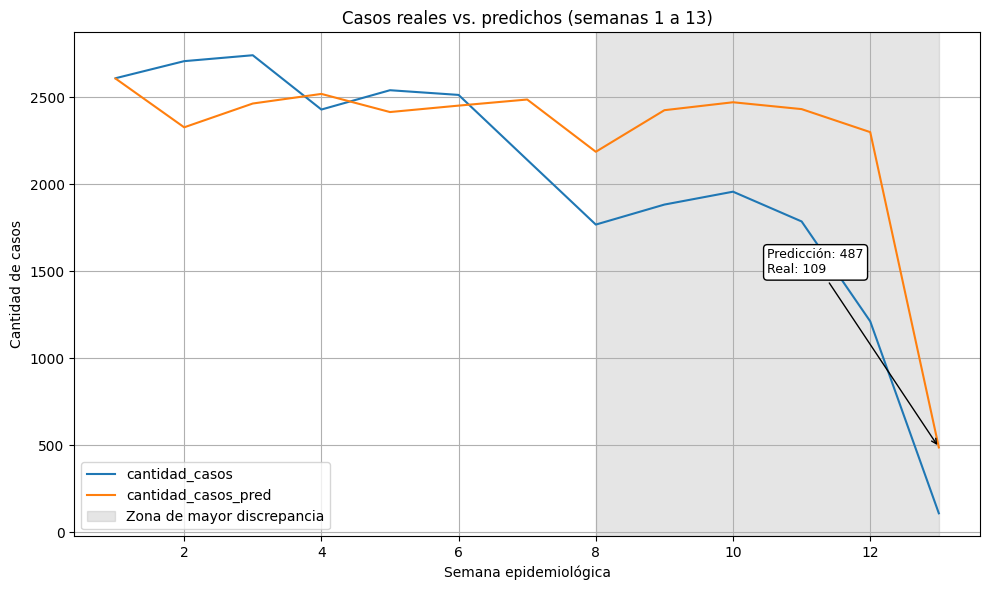

In [228]:
# Agrupar y graficar
ax = df_comparacion.groupby('semanas_epidemiologicas')[['cantidad_casos', 'cantidad_casos_pred']].sum().plot(
    figsize=(10, 6),
    title="Casos reales vs. predichos (semanas 1 a 13)",
    ylabel="Cantidad de casos",
    xlabel="Semana epidemiológica",
    grid=True
)

# Sombreado entre las semanas 8 y 13
plt.axvspan(8, 13, color='gray', alpha=0.2, label='Zona de mayor discrepancia')

# Obtener valores para la anotación en semana 13
semana_13 = 13
valor_real_13 = df_comparacion[df_comparacion['semanas_epidemiologicas'] == semana_13]['cantidad_casos'].sum()
valor_pred_13 = df_comparacion[df_comparacion['semanas_epidemiologicas'] == semana_13]['cantidad_casos_pred'].sum()

# Anotar diferencia en semana 13
plt.annotate(
    f'Predicción: {int(valor_pred_13)}\nReal: {int(valor_real_13)}',
    xy=(semana_13, valor_pred_13),
    xytext=(semana_13 - 2.5, valor_pred_13 + 1000),
    arrowprops=dict(arrowstyle='->', color='black'),
    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='black'),
    fontsize=9
)

plt.legend()
plt.tight_layout()
plt.show()


Podemos observar que las primeras semanas, hasta la 8, el modelo se mantiene casi a la par de los casos reales
A medida que avanzan las semanas, los valores reales comenzaron a disminuir, mientras que las predicciones mantuvieron niveles mas elevados.
Analizaremos por qué sucede esto

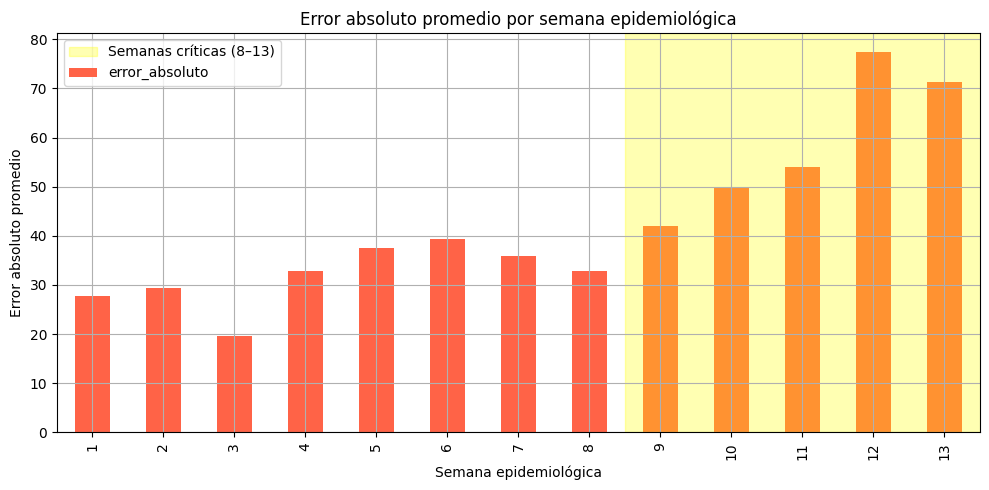

In [229]:
df_comparacion['error_absoluto'] = abs(df_comparacion['cantidad_casos'] - df_comparacion['cantidad_casos_pred'])
df_comparacion['error_relativo_%'] = 100 * df_comparacion['error_absoluto'] / df_comparacion['cantidad_casos'].replace(0, 1)

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(df_comparacion['cantidad_casos'], df_comparacion['cantidad_casos_pred'])
rmse = np.sqrt(mean_squared_error(df_comparacion['cantidad_casos'], df_comparacion['cantidad_casos_pred']))
mape = df_comparacion['error_relativo_%'].mean()

errores_por_semana = df_comparacion.groupby('semanas_epidemiologicas')['error_absoluto'].mean()

plt.figure(figsize=(10,5))
errores_por_semana.plot(kind='bar', color='tomato')
plt.title("Error absoluto promedio por semana epidemiológica")
plt.ylabel("Error absoluto promedio")
plt.xlabel("Semana epidemiológica")
plt.axvspan(7.5, 13.5, color='yellow', alpha=0.3, label="Semanas críticas (8–13)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


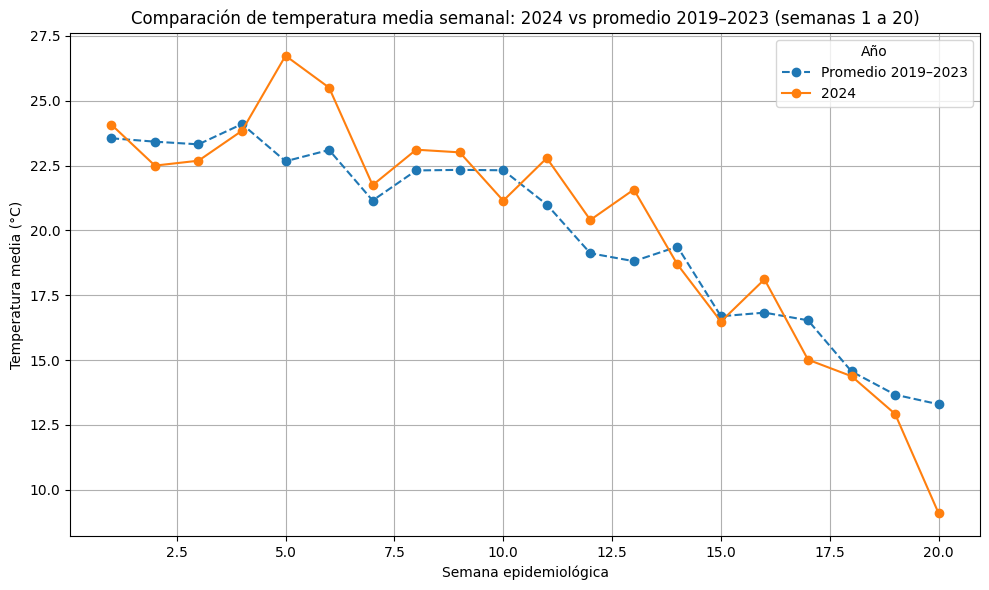

In [230]:
# Concatenar los tres DataFrames
df_total = pd.concat([df_temp2019_2022, df_temp2022_2023, Temperaturas_2024], ignore_index=True)

# Calcular temperatura media
df_total['temp_media'] = (df_total['Temperatura Max'] + df_total['Temperatura Min']) / 2

# Asegurar tipos
df_total['año'] = df_total['año'].astype(int)
df_total['semanas_epidemiologicas'] = df_total['semanas_epidemiologicas'].astype(int)

# Filtrar semanas 1 a 20
df_filtrado = df_total[
    (df_total['semanas_epidemiologicas'] >= 1) & 
    (df_total['semanas_epidemiologicas'] <= 20)
]

# Agrupar por año y semana
df_agg = df_filtrado.groupby(['año', 'semanas_epidemiologicas'], as_index=False)['temp_media'].mean()

# Calcular promedio histórico 2019-2023
df_historico = df_agg[df_agg['año'] < 2024].copy()
promedio_historico = (
    df_historico
    .groupby('semanas_epidemiologicas', as_index=False)['temp_media']
    .mean()
)
promedio_historico['año'] = 'Promedio 2019–2023'

# Datos de 2024
df_2024 = df_agg[df_agg['año'] == 2024].copy()

# Unir para graficar
df_plot = pd.concat([promedio_historico, df_2024], ignore_index=True)

# Graficar
plt.figure(figsize=(10,6))
for etiqueta in df_plot['año'].unique():
    datos = df_plot[df_plot['año'] == etiqueta]
    estilo = '--' if etiqueta == 'Promedio 2019–2023' else '-'
    plt.plot(datos['semanas_epidemiologicas'], datos['temp_media'], 
             linestyle=estilo, marker='o', label=str(etiqueta))

plt.title("Comparación de temperatura media semanal: 2024 vs promedio 2019–2023 (semanas 1 a 20)")
plt.xlabel("Semana epidemiológica")
plt.ylabel("Temperatura media (°C)")
plt.grid(True)
plt.legend(title="Año")
plt.tight_layout()
plt.show()


Analizando los datos, observamos que la temperatura medía en la semana 5 del año 2024 presento un incremento, alcanzando los 27 grados, en comparacion con el promedio historico que se mantuvo por debajo de los 24 grados. 
Ademas, se refleja como a medida que pasan las semanas, el MAE se mantiene con valores relativamente bajos (entre 20 y 40), seguido a un incremento cercano a 78 en la semana 12

###

### Funcion para usar el modelo

Para evaluar cómo se comporta el modelo ante casos concretos, implementamos una función llamada "buscar_prediccion" que permite predecir la cantidad de casos en una semana específica, para un determinado departamento y año. Esta predicción se realiza utilizando unicamente la información disponible hasta ese momento, tal como ocurriría en un escenario real.
La función devuelve tanto el valor estimado como el valor real observado (si está disponible), y calcula el error de la predicción. Actualmente, la función se encuentra limitada a predicciones de años hasta 2023. Además, si bien la base de datos comienza en 2019, no todos los departamentos cuentan con registros disponibles desde ese año

In [231]:
# Guardá los objetos necesarios en una vez (ejecutar una sola vez)
model_entrenado = model
datos_originales = df_sumado
cat_cols_global = cat_cols
cat_categories_global = cat_categories
feature_cols_global = feature_cols


In [232]:
def buscar_departamento(departamento_simple, provincia, df):
    dep = departamento_simple.strip().lower()
    prov = provincia.strip().lower()
    for d in df['Departamento'].unique():
        partes = d.split("_")
        if len(partes) == 2:
            dep_nom, prov_nom = partes
            if dep in dep_nom.lower() and prov in prov_nom.lower():
                return d
    return None
def buscar_prediccion(departamento_simple, provincia, semana_epi, año):
    from datetime import datetime
    import pandas as pd

    # Validación de semana
    if not (1 <= semana_epi <= 52):
        return f"Semana inválida: {semana_epi}. Debe estar entre 1 y 52."

    df = datos_originales
    model = model_entrenado
    feature_cols = feature_cols_global
    cat_cols = cat_cols_global
    cat_categories = cat_categories_global

    departamento = buscar_departamento(departamento_simple, provincia, df)
    if not departamento:
        return f"No se encontró el nombre del departamento '{departamento_simple}' con provincia '{provincia}'"

    df = df.copy()
    df['ds'] = pd.to_datetime(
        df['año'].astype(str) + df['semanas_epidemiologicas'].astype(str).str.zfill(2) + '1',
        format="%G%V%u"
    )
    target_fecha = pd.to_datetime(f"{año}{semana_epi:02d}1", format="%G%V%u")

    historial = df[(df['Departamento'] == departamento) & (df['ds'] < target_fecha)].sort_values('ds')

    if len(historial) < 4:
        return f"No hay suficientes datos previos para generar los lags (mínimo 4 semanas)."

    last = historial.iloc[-1:].copy()
    cur = last.copy()
    cur['ds'] = target_fecha
    cur['semanas_epidemiologicas'] = semana_epi
    cur['mes'] = cur['ds'].dt.month
    cur['semana_iso'] = cur['ds'].dt.isocalendar().week.astype(int)

    def estacion(sem):
        if 22 <= sem <= 39:
            return 'invierno'
        elif 40 <= sem or sem <= 12:
            return 'prim_ver'
        else:
            return 'oto_inv'

    cur['estacion'] = cur['semana_iso'].apply(estacion)

    clima_actual = df[(df['Departamento'] == departamento) & (df['ds'] == target_fecha)]
    if clima_actual.empty:
        return "No se encontró información climática para esa semana"

    for col in ['Temperatura Max', 'Temperatura Min', 'Precip', 'Humedad']:
        cur[col] = clima_actual[col].values[0]

    cur['temp_mean']  = (cur['Temperatura Max'] + cur['Temperatura Min']) / 2
    cur['temp_range'] = cur['Temperatura Max'] - cur['Temperatura Min']

    lags = historial[['cantidad_casos', 'Temperatura Min', 'Humedad']].tail(4).reset_index(drop=True)
    for i in range(1, 5):
        cur[f'y_lag{i}'] = lags.loc[4 - i, 'cantidad_casos']
    for i in range(1, 3):
        cur[f'tmin_lag{i}'] = lags.loc[2 - i, 'Temperatura Min']
        cur[f'hum_lag{i}']  = lags.loc[2 - i, 'Humedad']

    cur['y_roll3'] = cur[[f'y_lag{i}' for i in range(1, 4)]].mean(axis=1)
    cur['y_roll5'] = cur[[f'y_lag{i}' for i in range(1, 5)] + ['cantidad_casos']].mean(axis=1)

    for c in cat_cols:
        cur[c] = pd.Categorical(cur[c], categories=cat_categories[c])

    pred = model.predict(cur[feature_cols])[0]
    real = clima_actual['cantidad_casos'].values[0] if 'cantidad_casos' in clima_actual.columns else None

    return {
        'Departamento': departamento_simple.upper(),
        'Provincia': provincia.capitalize(),
        'Semana': semana_epi,
        'Año': año,
        'Predicción': float(round(pred, 2)),
        'Real': int(real) if real is not None else "No disponible",
        'Error Absoluto': float(round(abs(pred - real), 2)) if real is not None else "No disponible",
        'Error %': float(round(abs(pred - real) / real * 100, 2)) if real else "No disponible"
    }


In [233]:
#Probemos con un departamento aleatorio
buscar_prediccion("AZUL", "buenos aires", 5, 2019)

{'Departamento': 'AZUL',
 'Provincia': 'Buenos aires',
 'Semana': 5,
 'Año': 2019,
 'Predicción': 39.35,
 'Real': 52,
 'Error Absoluto': 12.65,
 'Error %': 24.32}

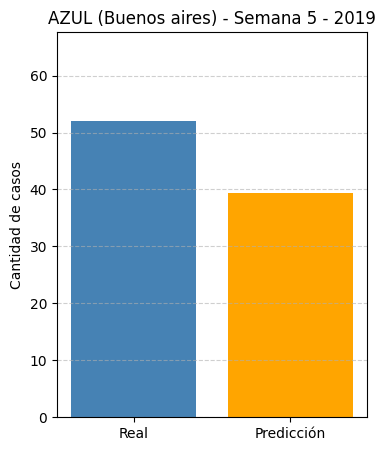

In [234]:
resultado = buscar_prediccion("Azul", "buenos aires", 5, 2019)

plt.figure(figsize=(4, 5))
plt.bar(["Real", "Predicción"], [resultado["Real"], resultado["Predicción"]], color=["steelblue", "orange"])
plt.title(f"{resultado['Departamento']} ({resultado['Provincia']}) - Semana {resultado['Semana']} - {resultado['Año']}")
plt.ylabel("Cantidad de casos")
plt.ylim(0, max(resultado["Real"], resultado["Predicción"]) * 1.3)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()
